# 1. Data Integration

In [1]:
#Data Integration - Import the data, and some features to work the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import numpy as np

data = pd.read_csv('train.csv', delimiter = ';')

#Eliminate visualization warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Data Exploration

In [2]:
data.head()

,Cust_ID,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,1,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,...,4,3,4,3,3,3,3,4,3,4
1,2,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,...,5,3,4,5,5,5,5,1,5,2
2,3,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,...,1,4,4,3,3,2,3,2,3,1
3,4,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,...,4,4,5,4,4,4,4,4,4,3
4,5,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,...,5,5,5,5,5,3,4,1,3,5


In [3]:
data.shape

(15589, 22)

In [4]:
data.info()
#Here the teacher said to minimize the weight of thr data, like int64 to int8 for example

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15589 entries, 0 to 15588
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cust_ID            15589 non-null  int64  
 1   Churn              15589 non-null  object 
 2   Name               15589 non-null  object 
 3   Longevity          15589 non-null  object 
 4   Year_Birth         15394 non-null  float64
 5   TypeTravel         15589 non-null  object 
 6   RoomType           15589 non-null  object 
 7   RewardPoints       15589 non-null  int64  
 8   Comfort            15589 non-null  int64  
 9   ReceptionSchedule  15589 non-null  int64  
 10  FoodDrink          15589 non-null  int64  
 11  Location           15589 non-null  int64  
 12  Wifi               15589 non-null  int64  
 13  Amenities          15589 non-null  int64  
 14  Staff              15589 non-null  int64  
 15  OnlineBooking      15589 non-null  int64  
 16  PriceQuality       155

In [5]:
#We notice some missing values, but how much % it is: 14
data.isna().sum()/len(data)*100

Cust_ID              0.000000
Churn                0.000000
Name                 0.000000
Longevity            0.000000
Year_Birth           1.250882
TypeTravel           0.000000
RoomType             0.000000
RewardPoints         0.000000
Comfort              0.000000
ReceptionSchedule    0.000000
FoodDrink            0.000000
Location             0.000000
Wifi                 0.000000
Amenities            0.000000
Staff                0.000000
OnlineBooking        0.000000
PriceQuality         0.000000
RoomSpace            0.000000
CheckOut             0.000000
Checkin              0.000000
Cleanliness          0.000000
BarService           0.000000
dtype: float64

## 2.1. Customers Characteristics Exploration

Text(0.5, 1.0, "Client's Reward Points")

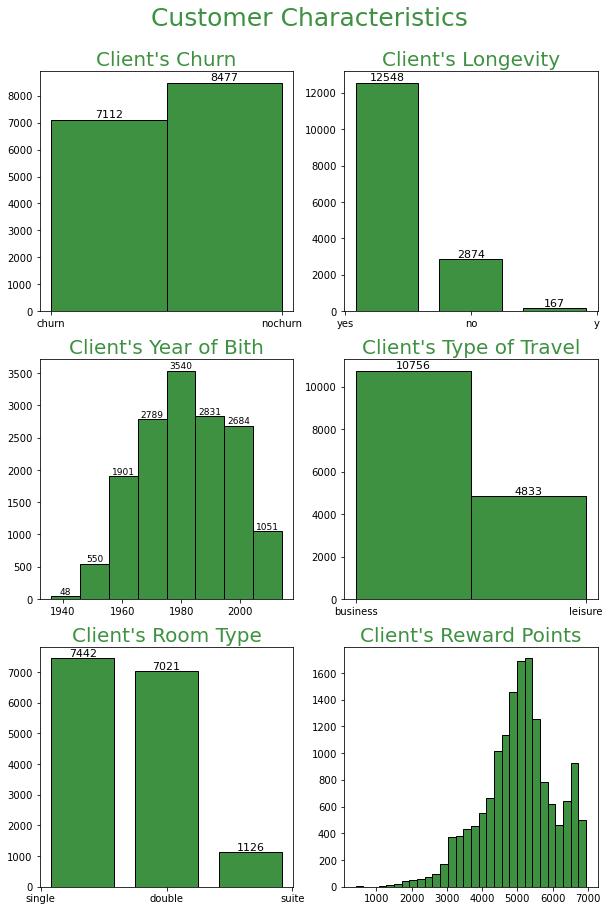

In [6]:
#We divided the data into two parts: this is the customer characteristics
fig, axs = plt.subplots(3,2, figsize=(10,15))
fig.suptitle('Customer Characteristics', size=25, color='#3D9140', y=0.94)

axs[0,0].hist(data=data, x='Churn',color='#3D9140', label='Churn', edgecolor='black', bins=2)
axs[0,0].set_title("Client's Churn", size=20, color='#3D9140')
axs[0,0].bar_label(axs[0,0].containers[0], size=11) 

axs[0,1].hist(data=data, x='Longevity',color='#3D9140', label='Longevity', edgecolor='black',bins=3, rwidth=0.75 )
axs[0,1].set_title("Client's Longevity", size=20, color='#3D9140')
axs[0,1].bar_label(axs[0,1].containers[0], size=11) 

axs[1,0].hist(data=data, x='Year_Birth', color='#3D9140', label='Year_Birth', edgecolor='black', bins=8)
axs[1,0].set_title("Client's Year of Bith", size=20, color='#3D9140')
axs[1,0].bar_label(axs[1,0].containers[0], size=9) 

axs[1,1].hist(data=data, x='TypeTravel', color='#3D9140', label='TypeTravel', edgecolor='black', bins=2)
axs[1,1].set_title("Client's Type of Travel", size=20, color='#3D9140')
axs[1,1].bar_label(axs[1,1].containers[0], size=11) 

axs[2,0].hist(data=data, x='RoomType',color='#3D9140', label='Room Type', edgecolor='black', bins=3, rwidth=0.75 )
axs[2,0].set_title("Client's Room Type", size=20, color='#3D9140')
axs[2,0].bar_label(axs[2,0].containers[0], size=11) 

axs[2,1].hist(data=data, x='RewardPoints', color='#3D9140', label='Reward Points', edgecolor='black', bins=30)
axs[2,1].set_title("Client's Reward Points", size=20, color='#3D9140')

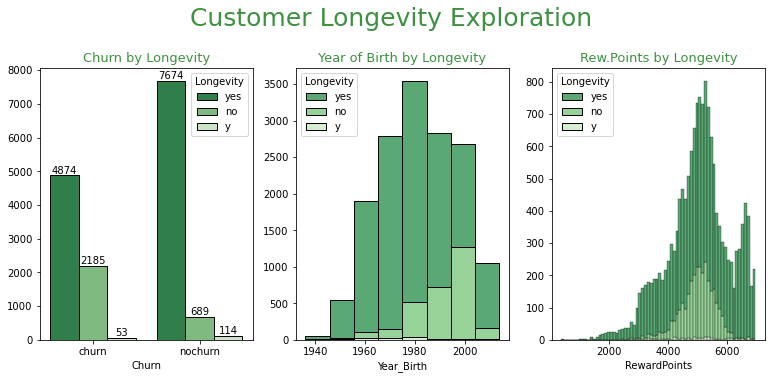

In [7]:
#Further Exploration

#Longevity
fig, ax = plt.subplots(1,3, figsize=(13,5))
fig.suptitle('Customer Longevity Exploration', size=25, color='#3D9140', y=1.05)

sns.countplot(x = 'Churn', data = data, edgecolor='black', hue='Longevity', ax=ax[0], palette='Greens_r')
ax[0].set_title("Churn by Longevity", color='#3D9140', size=13 )
ax[0].bar_label(ax[0].containers[0], size=10)
ax[0].bar_label(ax[0].containers[1], size=10) 
ax[0].bar_label(ax[0].containers[2], size=10) 

sns.histplot(x = 'Year_Birth', data = data, edgecolor='black', hue='Longevity', ax=ax[1], palette='Greens_r', bins=8,  multiple="stack")
ax[1].set_title("Year of Birth by Longevity", color='#3D9140', size=13 )

sns.histplot(x = "RewardPoints", data = data, edgecolor='black', hue='Longevity', ax=ax[2], palette='Greens_r',  multiple="stack")
ax[2].set_title("Rew.Points by Longevity", color='#3D9140', size=13 )

lista1=[0,1,2]
for i in lista1:
    plt.setp(ax[i], ylabel='')

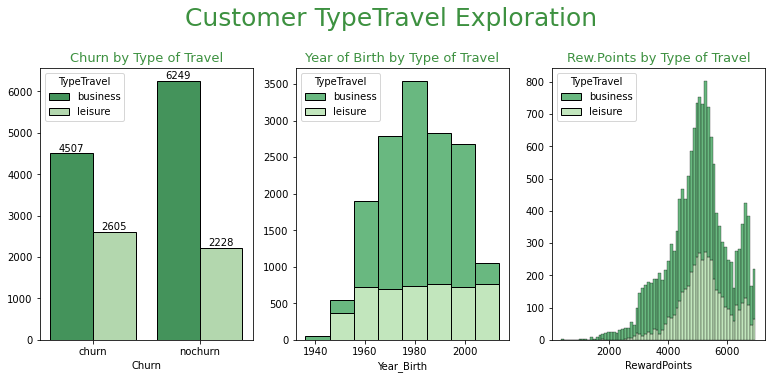

In [8]:
#Client's Type of Travel
fig, ax = plt.subplots(1,3, figsize=(13,5))
fig.suptitle('Customer TypeTravel Exploration', size=25, color='#3D9140', y=1.05)

sns.countplot(x = 'Churn', data = data, edgecolor='black', hue='TypeTravel', ax=ax[0], palette='Greens_r')
ax[0].set_title("Churn by Type of Travel", color='#3D9140', size=13 )
ax[0].bar_label(ax[0].containers[0], size=10)
ax[0].bar_label(ax[0].containers[1], size=10) 

sns.histplot(x = 'Year_Birth', data = data, edgecolor='black', hue='TypeTravel', ax=ax[1], palette='Greens_r', bins=8,  multiple="stack")
ax[1].set_title("Year of Birth by Type of Travel", color='#3D9140', size=13 )

sns.histplot(x = "RewardPoints", data = data, edgecolor='black', hue='TypeTravel', ax=ax[2], palette='Greens_r',  multiple="stack")
ax[2].set_title("Rew.Points by Type of Travel", color='#3D9140', size=13 )

lista1=[0,1,2]
for i in lista1:
    plt.setp(ax[i], ylabel='')

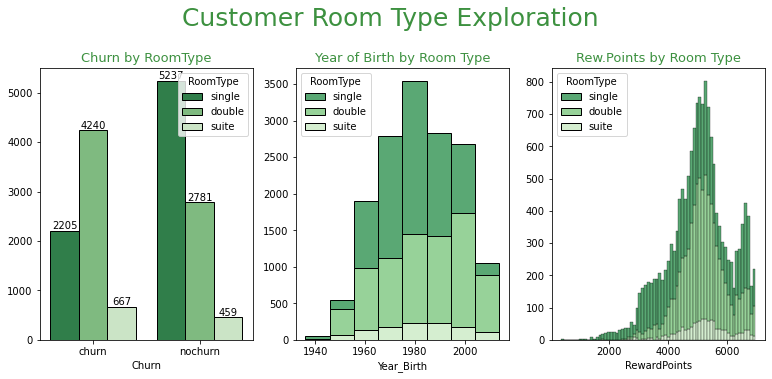

In [9]:
#Client's Room Type
fig, ax = plt.subplots(1,3, figsize=(13,5))
fig.suptitle('Customer Room Type Exploration', size=25, color='#3D9140', y=1.05)

sns.countplot(x = 'Churn', data = data, edgecolor='black', hue='RoomType', ax=ax[0], palette='Greens_r')
ax[0].set_title("Churn by RoomType", color='#3D9140', size=13 )
ax[0].bar_label(ax[0].containers[0], size=10)
ax[0].bar_label(ax[0].containers[1], size=10) 
ax[0].bar_label(ax[0].containers[2], size=10) 

sns.histplot(x = 'Year_Birth', data = data, edgecolor='black', hue='RoomType', ax=ax[1], palette='Greens_r', bins=8,  multiple="stack")
ax[1].set_title("Year of Birth by Room Type", color='#3D9140', size=13 )

sns.histplot(x = "RewardPoints", data = data, edgecolor='black', hue='RoomType', ax=ax[2], palette='Greens_r',  multiple="stack")
ax[2].set_title("Rew.Points by Room Type", color='#3D9140', size=13 )

lista1=[0,1,2]
for i in lista1:
    plt.setp(ax[i], ylabel='')

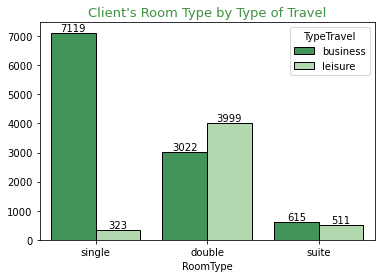

In [10]:
#Client's Room Type by Type of Travel
ax=sns.countplot(x='RoomType', hue='TypeTravel', data=data, edgecolor='black', palette='Greens_r')
plt.title("Client's Room Type by Type of Travel", color='#3D9140', size=13)
plt.ylabel('')
ax.bar_label(ax.containers[0], size=10)
ax.bar_label(ax.containers[1], size=10)
plt.show()


## 2.2. Customers Satisfaction Exploration

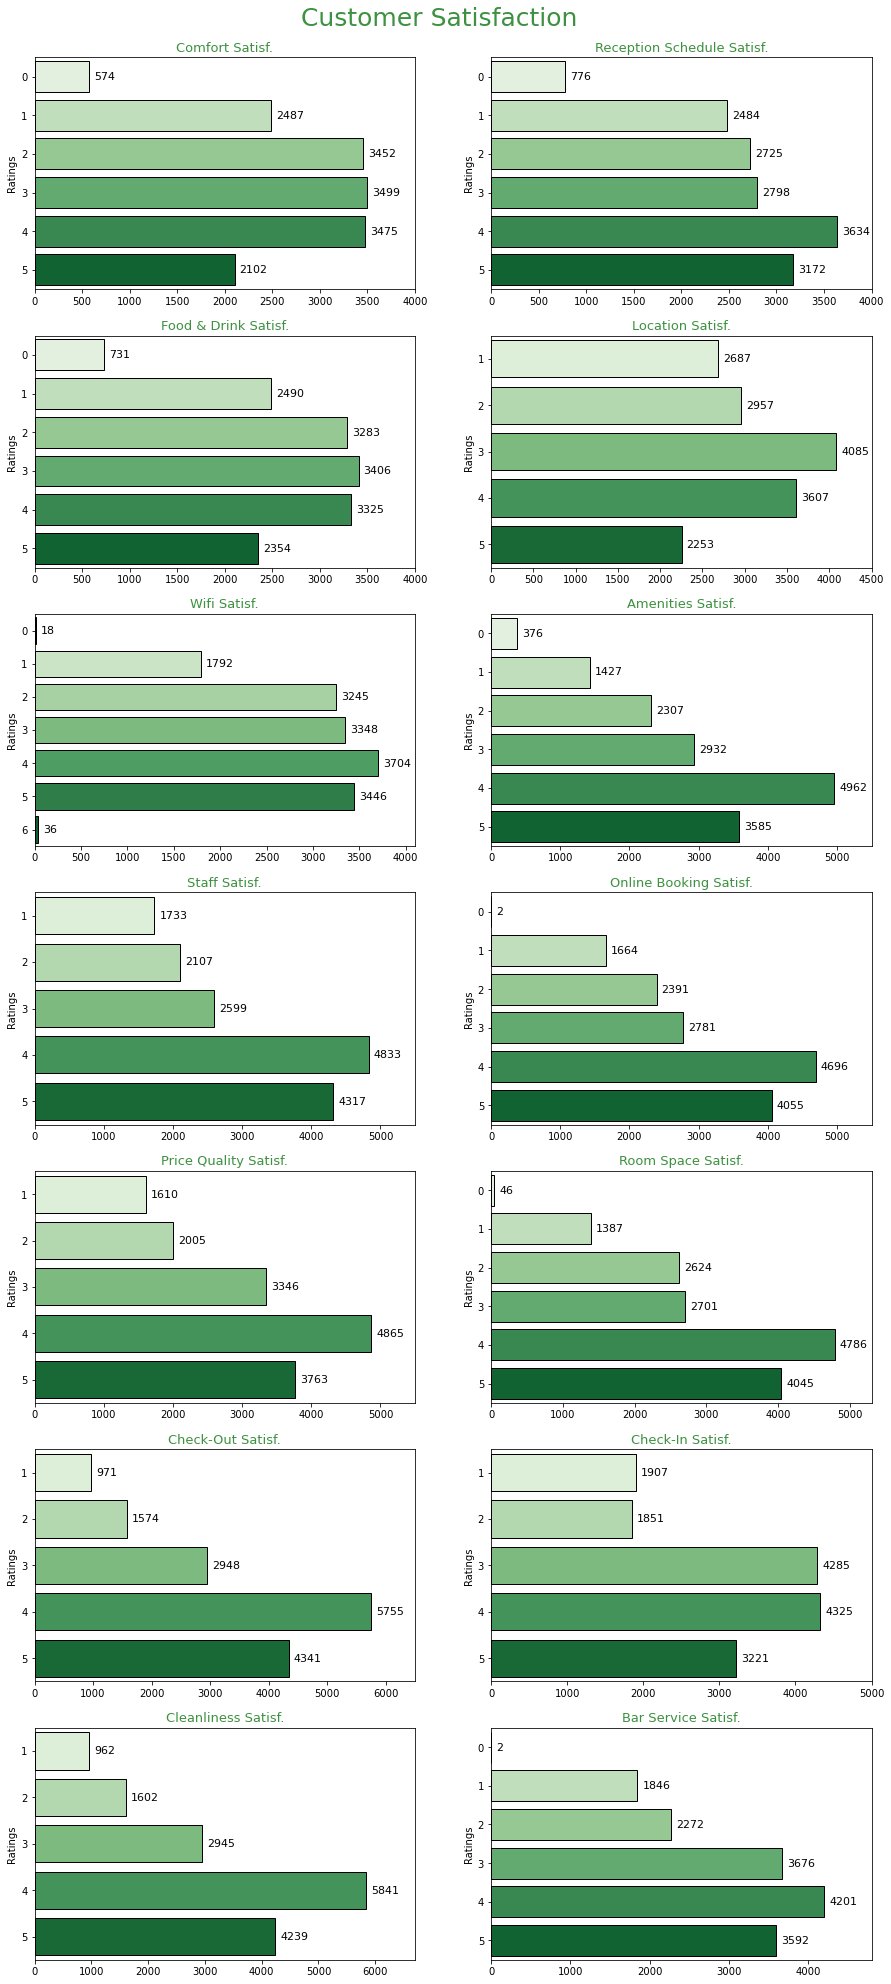

In [11]:
#We divided the data into two parts: this is the customer satisfaction
fig, ax = plt.subplots(7,2, figsize=(15,35))
fig.suptitle('Customer Satisfaction', size=25, color='#3D9140', y=0.9)

sns.countplot(y = 'Comfort', data = data, edgecolor='black', palette="Greens", ax=ax[0,0])
ax[0,0].set_title("Comfort Satisf.", color='#3D9140', size=13 )
ax[0,0].bar_label(ax[0,0].containers[0], size=11, padding=5) 
ax[0,0].set_xlim(right=4000)

sns.countplot(y = 'ReceptionSchedule', data = data, edgecolor='black', palette="Greens", ax=ax[0,1])
ax[0,1].set_title("Reception Schedule Satisf.", color='#3D9140', size=13 )
ax[0,1].bar_label(ax[0,1].containers[0], size=11, padding=5) 
ax[0,1].set_xlim(right=4000)

sns.countplot(y = 'FoodDrink', data = data, edgecolor='black', palette="Greens", ax=ax[1,0])
ax[1,0].set_title("Food & Drink Satisf.", color='#3D9140', size=13 )
ax[1,0].bar_label(ax[1,0].containers[0], size=11, padding=5) 
ax[1,0].set_xlim(right=4000)

sns.countplot(y = 'Location', data = data, edgecolor='black', palette="Greens", ax=ax[1,1])
ax[1,1].set_title("Location Satisf.", color='#3D9140', size=13 )
ax[1,1].bar_label(ax[1,1].containers[0], size=11, padding=5) 
ax[1,1].set_xlim(right=4500)

sns.countplot(y = 'Wifi', data = data, edgecolor='black', palette="Greens", ax=ax[2,0])
ax[2,0].set_title("Wifi Satisf.", color='#3D9140', size=13 )
ax[2,0].bar_label(ax[2,0].containers[0], size=11, padding=5) 
ax[2,0].set_xlim(right=4100)

sns.countplot(y = 'Amenities', data = data, edgecolor='black', palette="Greens", ax=ax[2,1])
ax[2,1].set_title("Amenities Satisf.", color='#3D9140', size=13 )
ax[2,1].bar_label(ax[2,1].containers[0], size=11, padding=5) 
ax[2,1].set_xlim(right=5500)

sns.countplot(y = 'Staff', data = data, edgecolor='black', palette="Greens", ax=ax[3,0])
ax[3,0].set_title("Staff Satisf.", color='#3D9140', size=13 )
ax[3,0].bar_label(ax[3,0].containers[0], size=11, padding=5) 
ax[3,0].set_xlim(right=5500)

sns.countplot(y = 'OnlineBooking', data = data, edgecolor='black', palette="Greens", ax=ax[3,1])
ax[3,1].set_title("Online Booking Satisf.", color='#3D9140', size=13 )
ax[3,1].bar_label(ax[3,1].containers[0], size=11, padding=5) 
ax[3,1].set_xlim(right=5500)

sns.countplot(y = 'PriceQuality', data = data, edgecolor='black', palette="Greens", ax=ax[4,0])
ax[4,0].set_title("Price Quality Satisf.", color='#3D9140', size=13 )
ax[4,0].bar_label(ax[4,0].containers[0], size=11, padding=5) 
ax[4,0].set_xlim(right=5500)

sns.countplot(y = 'RoomSpace', data = data, edgecolor='black', palette="Greens", ax=ax[4,1])
ax[4,1].set_title("Room Space Satisf.", color='#3D9140', size=13 )
ax[4,1].bar_label(ax[4,1].containers[0], size=11, padding=5) 
ax[4,1].set_xlim(right=5300)

sns.countplot(y = 'CheckOut', data = data, edgecolor='black', palette="Greens", ax=ax[5,0])
ax[5,0].set_title("Check-Out Satisf.", color='#3D9140', size=13 )
ax[5,0].bar_label(ax[5,0].containers[0], size=11, padding=5) 
ax[5,0].set_xlim(right=6500)

sns.countplot(y = 'Checkin', data = data, edgecolor='black', palette="Greens", ax=ax[5,1])
ax[5,1].set_title("Check-In Satisf.", color='#3D9140', size=13 )
ax[5,1].bar_label(ax[5,1].containers[0], size=11, padding=5) 
ax[5,1].set_xlim(right=5000)

sns.countplot(y = 'Cleanliness', data = data, edgecolor='black', palette="Greens", ax=ax[6,0])
ax[6,0].set_title("Cleanliness Satisf.", color='#3D9140', size=13 )
ax[6,0].bar_label(ax[6,0].containers[0], size=11, padding=5) 
ax[6,0].set_xlim(right=6700)

sns.countplot(y = 'BarService', data = data, edgecolor='black', palette="Greens", ax=ax[6,1])
ax[6,1].set_title("Bar Service Satisf.", color='#3D9140', size=13 )
ax[6,1].bar_label(ax[6,1].containers[0], size=11, padding=5) 
ax[6,1].set_xlim(right=4800)

lista= [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1),(3,0),(3,1),(4,0),(4,1),(5,0),(5,1),(6,0),(6,1)]
for i,j in lista:
    plt.setp(ax[i,j], xlabel='')
    plt.setp(ax[i,j], ylabel='Ratings')

# 3. Preprocessing 

In [12]:
copy = data.copy()

In [13]:
#Transform CustID as index
copy.set_index("Cust_ID", inplace=True)
copy

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
2,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
3,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
4,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
5,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15585,churn,Ms. Wendy Roberts,no,1988.0,business,double,4968,2,0,2,...,3,2,4,3,4,5,1,3,4,3
15586,churn,Ms. Sonya Smith,no,2000.0,business,double,4970,3,3,3,...,5,3,5,5,3,1,3,4,4,5
15587,nochurn,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,3,4,5,4,4,4,4,5,4,4


## 3.1. Treating Missing Values

In [14]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15589 entries, 1 to 15589
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15589 non-null  object 
 1   Name               15589 non-null  object 
 2   Longevity          15589 non-null  object 
 3   Year_Birth         15394 non-null  float64
 4   TypeTravel         15589 non-null  object 
 5   RoomType           15589 non-null  object 
 6   RewardPoints       15589 non-null  int64  
 7   Comfort            15589 non-null  int64  
 8   ReceptionSchedule  15589 non-null  int64  
 9   FoodDrink          15589 non-null  int64  
 10  Location           15589 non-null  int64  
 11  Wifi               15589 non-null  int64  
 12  Amenities          15589 non-null  int64  
 13  Staff              15589 non-null  int64  
 14  OnlineBooking      15589 non-null  int64  
 15  PriceQuality       15589 non-null  int64  
 16  RoomSpace          155

In [15]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
#We see that there is mmissing values, so isolate Year_Birth
YearBirth = copy[['Year_Birth']].copy()

scaler1 = MinMaxScaler()
YearBirth = pd.DataFrame(scaler1.fit_transform(YearBirth), columns = YearBirth.columns, index=copy.index)

imputer1 = KNNImputer(n_neighbors=5)
YearBirth = pd.DataFrame(imputer1.fit_transform(YearBirth),columns = YearBirth.columns, index=copy.index)

#If we check there is no more missing values
print(YearBirth.isnull().sum())

#We now undo the transformation to get the real values, to later transform in age:
YearBirth = pd.DataFrame(scaler1.inverse_transform(YearBirth),columns = YearBirth.columns)
YearBirth.index = copy.index

#Delete old Year_Birth and Join this new Year_Birth to train_c
copy.drop('Year_Birth', inplace=True, axis=1)

copy = pd.concat([copy, YearBirth], axis=1) 
copy.info()



Year_Birth    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15589 entries, 1 to 15589
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15589 non-null  object 
 1   Name               15589 non-null  object 
 2   Longevity          15589 non-null  object 
 3   TypeTravel         15589 non-null  object 
 4   RoomType           15589 non-null  object 
 5   RewardPoints       15589 non-null  int64  
 6   Comfort            15589 non-null  int64  
 7   ReceptionSchedule  15589 non-null  int64  
 8   FoodDrink          15589 non-null  int64  
 9   Location           15589 non-null  int64  
 10  Wifi               15589 non-null  int64  
 11  Amenities          15589 non-null  int64  
 12  Staff              15589 non-null  int64  
 13  OnlineBooking      15589 non-null  int64  
 14  PriceQuality       15589 non-null  int64  
 15  RoomSpace          15589 non-null  int64 

## 3.2. Creating New Variables 

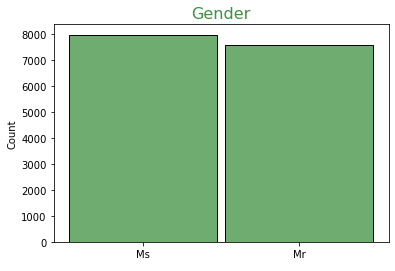

In [16]:
#From Name we can get the gender! 
copy['Gender'] = copy['Name'].astype(str).str[0:2]

#Seeing the types of gender we have
ax=sns.histplot(data=copy, x='Gender',shrink=0.95, color='#3D9140')
plt.title("Gender", size=16, color='#3D9140')
plt.xlabel(' ',size=1)

#So we transform Ms in 0 and Mr in 1
copy['Gender'].replace(['Ms', 'Mr'],[0,1], inplace = True)

#Rename it so we know
copy.rename(columns = {'Gender': 'Male'}, inplace=True)

#Drop name
copy.drop('Name', inplace=True, axis=1)


In [17]:
#year to age
copy['Age'] = date.today().year - copy['Year_Birth']

#drop year
copy.drop('Year_Birth', inplace=True, axis=1)

## 3.3. Coeherence Checking

In [18]:
#Coeherence of Ratings on Wifi - Transform the 6 in 5 since it did not make sense
copy['Wifi'].replace(6,5, inplace = True)
copy['Wifi'].max()

#Coherence of Longevity - same thinking y-> yes
copy['Longevity'].replace('y', 'yes', inplace=True)

#Checking the max and min of Age
print(round(copy['Age'].min()))
print(round(copy['Age'].max()))


8
86


## 3.4. Transforming Categorical Data

In [19]:
#Transform Churn/Longevity to 0,1 and other categorical variables*
copy.replace(['churn', 'nochurn'], [1, 0], inplace=True)
copy['Longevity'].replace(['yes', 'no'], [1,0], inplace=True)

#We create dummy variables for Type of Travel and Room Type, since they had only 2 and 3 categories, respectively
categorical_dat = copy[['TypeTravel', 'RoomType']].copy()
dummy=pd.get_dummies(categorical_dat, drop_first=True)

#merge train_c and ours dummmy variables
copy = pd.concat([copy, dummy], axis=1) #saw in the internet, outter join by index
copy.drop(['TypeTravel', 'RoomType'], inplace=True, axis=1) #we need to take the '#' when reruning!

#change the names of the new variables:
copy.rename(columns = {'TypeTravel_leisure': 'Leisure_Travel', 'RoomType_single': 'Single_Room', 'RoomType_suite' : 'Suite'}, inplace=True)
copy.head()

,Churn,Longevity,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,...,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Male,Age,Leisure_Travel,Single_Room,Suite
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,1,1,4907,3,4,1,4,4,3,4,...,3,3,4,3,4,0,48.0,0,1,0
2,0,1,6724,1,1,1,1,5,3,4,...,5,5,1,5,2,1,57.0,0,1,0
3,1,1,4365,3,3,3,3,1,4,4,...,2,3,2,3,1,1,49.0,0,1,0
4,0,1,3849,1,1,1,1,4,4,5,...,4,4,4,4,3,0,29.0,1,0,0
5,0,1,5376,2,2,3,2,5,5,5,...,3,4,1,3,5,1,33.0,0,1,0


## 3.5. Changing Datatypes

In [20]:
copy['Churn'] = copy['Churn'].astype('int8')
copy['Longevity'] = copy['Longevity'].astype('int8')
copy['RewardPoints'] = copy['RewardPoints'].astype('int16')
copy['Comfort'] = copy['Comfort'].astype('int8')
copy['ReceptionSchedule'] = copy['ReceptionSchedule'].astype('int8')
copy['FoodDrink'] = copy['FoodDrink'].astype('int8')
copy['Location'] = copy['Location'].astype('int8')
copy['Wifi'] = copy['Wifi'].astype('int8')
copy['Amenities'] = copy['Amenities'].astype('int8')
copy['Staff'] = copy['Staff'].astype('int8')
copy['OnlineBooking'] = copy['OnlineBooking'].astype('int8')
copy['PriceQuality'] = copy['PriceQuality'].astype('int8')
copy['RoomSpace'] = copy['RoomSpace'].astype('int8')
copy['CheckOut'] = copy['CheckOut'].astype('int8')
copy['Checkin'] = copy['Checkin'].astype('int8')
copy['Cleanliness'] = copy['Cleanliness'].astype('int8')
copy['BarService'] = copy['BarService'].astype('int8')
copy['Male'] = copy['Male'].astype('int8')
copy['Age'] = copy['Age'].astype('int8')
copy['Leisure_Travel'] = copy['Leisure_Travel'].astype('int8')
copy['Single_Room'] = copy['Single_Room'].astype('int8')
copy['Suite'] = copy['Suite'].astype('int8')


In [21]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15589 entries, 1 to 15589
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Churn              15589 non-null  int8 
 1   Longevity          15589 non-null  int8 
 2   RewardPoints       15589 non-null  int16
 3   Comfort            15589 non-null  int8 
 4   ReceptionSchedule  15589 non-null  int8 
 5   FoodDrink          15589 non-null  int8 
 6   Location           15589 non-null  int8 
 7   Wifi               15589 non-null  int8 
 8   Amenities          15589 non-null  int8 
 9   Staff              15589 non-null  int8 
 10  OnlineBooking      15589 non-null  int8 
 11  PriceQuality       15589 non-null  int8 
 12  RoomSpace          15589 non-null  int8 
 13  CheckOut           15589 non-null  int8 
 14  Checkin            15589 non-null  int8 
 15  Cleanliness        15589 non-null  int8 
 16  BarService         15589 non-null  int8 
 17  Male        

## 3.6. Treating Outliers

Text(0.5, 0, ' ')

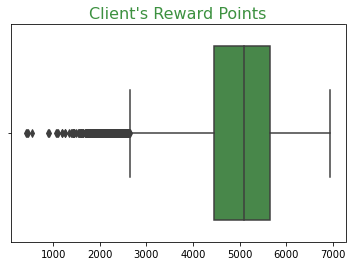

In [22]:
#Vizualizing better the outliers:
sns.boxplot(x='RewardPoints', data = copy, color='#3D9140')
plt.title("Client's Reward Points", size=16, color='#3D9140')
plt.xlabel(' ',size=1)

In [23]:
#How skewed is the data?
copy['RewardPoints'].agg(['skew', 'kurtosis']).transpose()

#So we discover that that our data is fairly simetrical

skew       -0.453779
kurtosis    0.260135
Name: RewardPoints, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


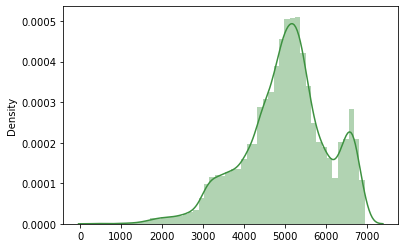

In [24]:
#Original Reward Points
print(sns.distplot(x=data['RewardPoints'],color='#3D9140'))

#We also notice that we have a negativly skwed data, so we have to appropriate the transformations:

<AxesSubplot:xlabel='RewardPoints'>

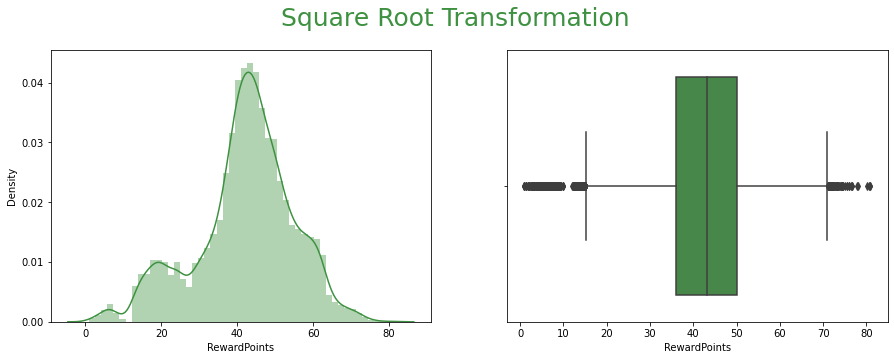

In [25]:
#Treating them, 1 try:
#RewardsPoints variable scale to Square Root Transforming Negatively Skewed Data:
fig, axs = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Square Root Transformation', size=25, color='#3D9140', y=1)

rewpoints_sqrt = np.sqrt(max(copy['RewardPoints']+1)-copy['RewardPoints'])
sns.distplot(rewpoints_sqrt,color='#3D9140', ax=axs[0]) 

sns.boxplot(x=rewpoints_sqrt, color='#3D9140', ax=axs[1])

<AxesSubplot:xlabel='RewardPoints'>

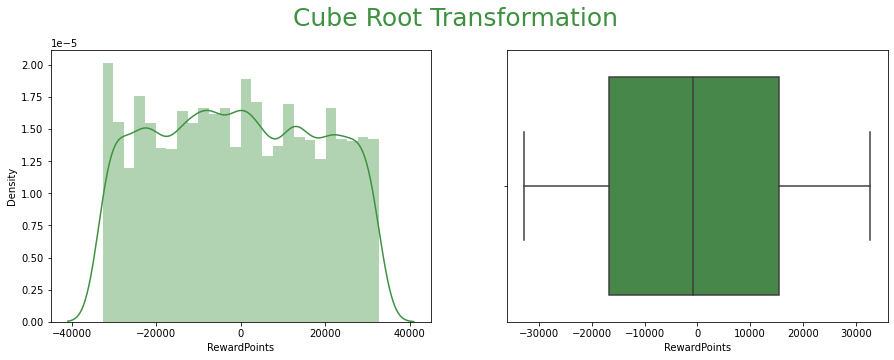

In [26]:
#2 try:
#RewardsPoints variable scale to Cube Root Transforming Negatively Skewed Data:
fig, axs = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Cube Root Transformation', size=25, color='#3D9140', y=1)

rewpoints_cube = np.power(max(copy['RewardPoints']+1)-copy['RewardPoints'],3)
sns.distplot(rewpoints_cube,color='#3D9140', ax=axs[0]) 

sns.boxplot(x=rewpoints_cube, color='#3D9140', ax=axs[1])

<AxesSubplot:xlabel='RewardPoints'>

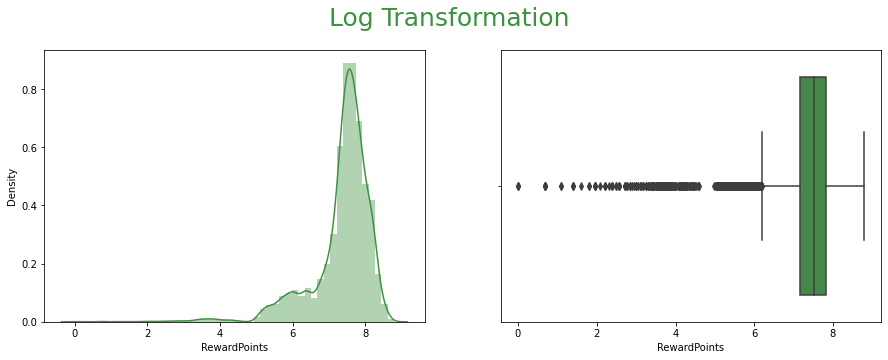

In [27]:
#3 try:
#RewardsPoints variable scale to Log Transforming Negatively Skewed Data:
fig, axs = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Log Transformation', size=25, color='#3D9140', y=1)

rewpoints_log = np.log(max(copy['RewardPoints']+1)-copy['RewardPoints'])
sns.distplot(rewpoints_log,color='#3D9140', ax=axs[0]) 

sns.boxplot(x=rewpoints_log, color='#3D9140', ax=axs[1])

#Worst!!

<AxesSubplot:xlabel='RewardPoints'>

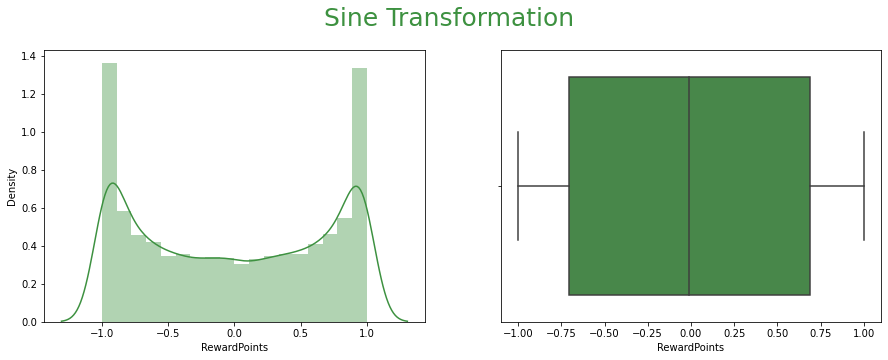

In [28]:
#4 try:
#RewardsPoints variable scale to Arcsine Transforming Negatively Skewed Data:
fig, axs = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Sine Transformation', size=25, color='#3D9140', y=1)

rewpoints_sin = np.sin(max(copy['RewardPoints']+1)-copy['RewardPoints'])
sns.distplot(rewpoints_sin,color='#3D9140', ax=axs[0]) 

sns.boxplot(x=rewpoints_sin, color='#3D9140', ax=axs[1])

In [29]:
#Implementing the new RewardPoints
copy['New_RewardPoints'] = rewpoints_cube

#Drop the old Reward Points
copy.drop('RewardPoints', inplace=True, axis=1)
copy.head()

,Churn,Longevity,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,...,CheckOut,Checkin,Cleanliness,BarService,Male,Age,Leisure_Travel,Single_Room,Suite,New_RewardPoints
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,1,1,3,4,1,4,4,3,4,3,...,3,4,3,4,0,48,0,1,0,32704
2,0,1,1,1,1,1,5,3,4,5,...,5,1,5,2,1,57,0,1,0,31675
3,1,1,3,3,3,3,1,4,4,3,...,3,2,3,1,1,48,0,1,0,31912
4,0,1,1,1,1,1,4,4,5,4,...,4,4,4,3,0,29,1,0,0,-1672
5,0,1,2,2,3,2,5,5,5,5,...,4,1,3,5,1,33,0,1,0,-9801


## 3.7. Deleting Correlated Data

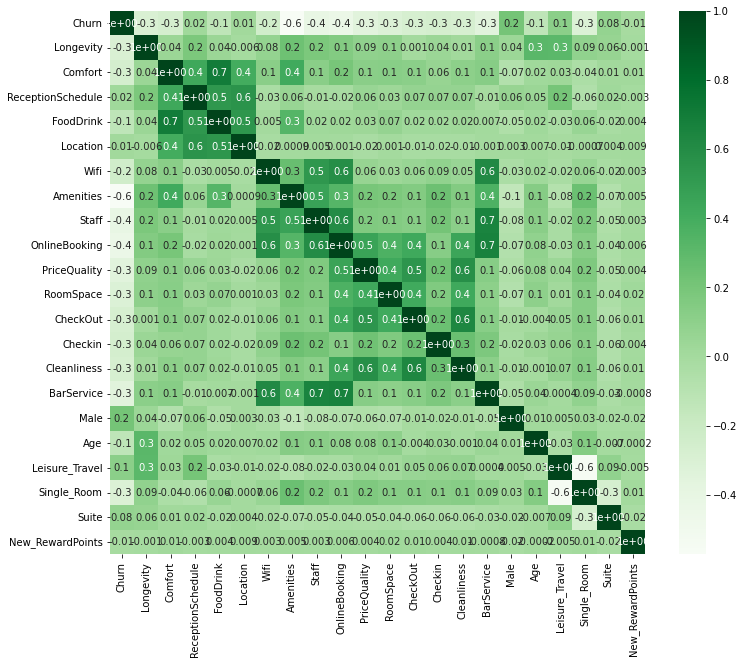

In [30]:
#Correlation Matrix_ Spearman Method
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = 'Greens', fmt='.1')
    plt.show()
    
cor_spearman = copy.corr(method ='spearman')
cor_heatmap(cor_spearman)

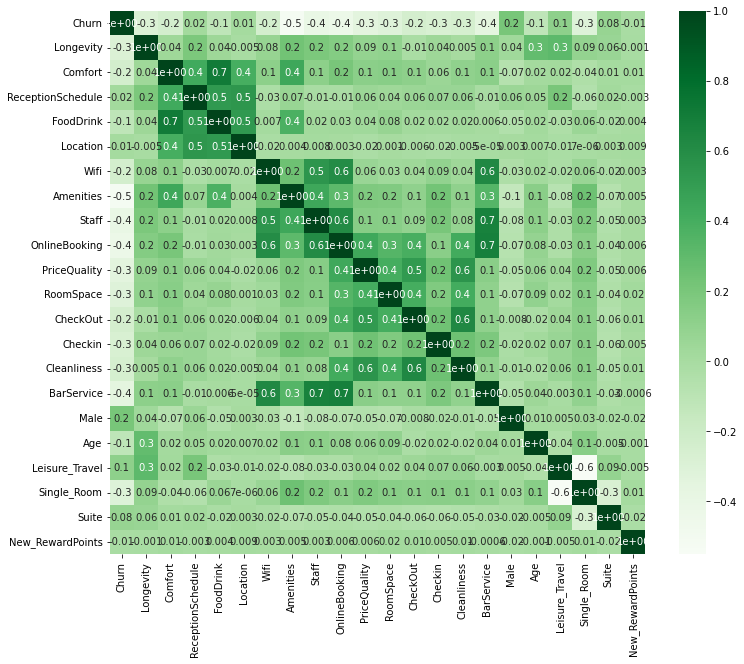

In [31]:
#Correlation Matrix_ Pearson Method
cor_pearson = copy.corr(method ='pearson')
cor_heatmap(cor_pearson)

In [32]:
#We drop these variables due to bad explanation in the models
copy.drop(columns=['Suite', 'Male'], inplace=True )

## 3.8. Scaling the data

In [33]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

X_data = copy.copy()

scaler = RobustScaler().fit(X_data)
r_scale = scaler.transform(X_data)

S_data = pd.DataFrame(r_scale, columns = X_data.columns, index=X_data.index)
S_data.head()

,Churn,Longevity,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Age,Leisure_Travel,Single_Room,New_RewardPoints
Cust_ID,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.5,-1.0,0.5,0.5,-0.5,0.0,-0.333333,-1.0,-0.333333,-0.5,1.0,-0.5,0.5,0.333333,0.0,1.0,1.045550
2,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-0.5,0.0,0.333333,1.0,0.333333,0.5,-2.0,0.5,-0.5,0.708333,0.0,1.0,1.013446
3,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-0.333333,-1.0,-0.666667,-0.5,-1.0,-0.5,-1.0,0.333333,0.0,1.0,1.020840
4,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.5,0.0,0.5,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,-0.458333,1.0,0.0,-0.026924
5,0.0,0.0,-0.5,-0.5,0.0,-0.5,1.0,0.5,0.5,0.333333,1.0,-0.333333,0.0,-2.0,-0.5,1.0,-0.291667,0.0,1.0,-0.280535


In [34]:
copy.columns

Index(['Churn', 'Longevity', 'Comfort', 'ReceptionSchedule', 'FoodDrink',
       'Location', 'Wifi', 'Amenities', 'Staff', 'OnlineBooking',
       'PriceQuality', 'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness',
       'BarService', 'Age', 'Leisure_Travel', 'Single_Room',
       'New_RewardPoints'],
      dtype='object')

In [35]:
S_data = S_data.astype('float16')

# 4. Defining Prespectives

In [36]:
satisf_data = S_data[['Comfort','ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace','CheckOut', 'Checkin', 'Cleanliness','BarService']]
charac_data = S_data[['Churn', 'Longevity', 'Age', 'Leisure_Travel', 'Single_Room', 'New_RewardPoints']]

In [37]:
S_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15589 entries, 1 to 15589
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15589 non-null  float16
 1   Longevity          15589 non-null  float16
 2   Comfort            15589 non-null  float16
 3   ReceptionSchedule  15589 non-null  float16
 4   FoodDrink          15589 non-null  float16
 5   Location           15589 non-null  float16
 6   Wifi               15589 non-null  float16
 7   Amenities          15589 non-null  float16
 8   Staff              15589 non-null  float16
 9   OnlineBooking      15589 non-null  float16
 10  PriceQuality       15589 non-null  float16
 11  RoomSpace          15589 non-null  float16
 12  CheckOut           15589 non-null  float16
 13  Checkin            15589 non-null  float16
 14  Cleanliness        15589 non-null  float16
 15  BarService         15589 non-null  float16
 16  Age                155

In [38]:
satisf_data

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Cust_ID,,,,,,,,,,,,,,
1,0.0,0.5,-1.0,0.5,0.5,-0.5,0.0,-0.333252,-1.0,-0.333252,-0.5,1.0,-0.5,0.5
2,-1.0,-1.0,-1.0,-1.0,1.0,-0.5,0.0,0.333252,1.0,0.333252,0.5,-2.0,0.5,-0.5
3,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-0.333252,-1.0,-0.666504,-0.5,-1.0,-0.5,-1.0
4,-1.0,-1.0,-1.0,-1.0,0.5,0.0,0.5,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0
5,-0.5,-0.5,0.0,-0.5,1.0,0.5,0.5,0.333252,1.0,-0.333252,0.0,-2.0,-0.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15585,-0.5,-1.5,-0.5,-0.5,0.0,-1.0,0.0,-0.333252,0.0,0.333252,-1.5,0.0,0.0,0.0
15586,0.0,0.0,0.0,0.0,1.0,-0.5,0.5,0.333252,-1.0,-1.000000,-0.5,1.0,0.0,1.0
15587,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.5,0.000000,0.0,0.000000,0.0,2.0,0.0,0.5


In [39]:
charac_data

,Churn,Longevity,Age,Leisure_Travel,Single_Room,New_RewardPoints
Cust_ID,,,,,,
1,1.0,0.0,0.333252,0.0,1.0,1.045898
2,0.0,0.0,0.708496,0.0,1.0,1.013672
3,1.0,0.0,0.333252,0.0,1.0,1.020508
4,0.0,0.0,-0.458252,1.0,0.0,-0.026932
5,0.0,0.0,-0.291748,0.0,1.0,-0.280518
...,...,...,...,...,...,...
15585,1.0,-1.0,-0.250000,0.0,0.0,-0.172485
15586,1.0,-1.0,-0.750000,0.0,0.0,0.545410
15587,0.0,0.0,0.750000,0.0,1.0,-0.335938


# 5. Modelling

## 5.1. K-Means Clustering
    1. Choose a number of clusters k;
    2. Randomly assign each data point to a specific cluster;
    3. Until the clusters stop changing do:
        A. Compute the centroid;
        B. Assign data points to closest centroid.

### 5.1.1. Number of Clusters: Elbow Method

In [40]:
from sklearn.cluster import KMeans

#For Satisfaction of the clients!
#We will now measure the quality of clusterings with different numbers of clusters (different k)
listk_sat = range(1, 10)
inertias_sat = []

for k in listk_sat:
    model_knn_s = KMeans(n_clusters=k) #Create the model with k seeds
    model_knn_s.fit(satisf_data) #Fit the model
    inertias_sat.append(model_knn_s.inertia_) #Add the each inertia of each seed to a list
    
#For the Characteristics of the clients! 
listk_char = range(1, 10)
inertias_char = []

for k in listk_char:
    model_knn_c = KMeans(n_clusters=k) #Create the model with k seeds
    model_knn_c.fit(charac_data) #Fit the model
    inertias_char.append(model_knn_c.inertia_) #Add the each inertia of each seed to a list

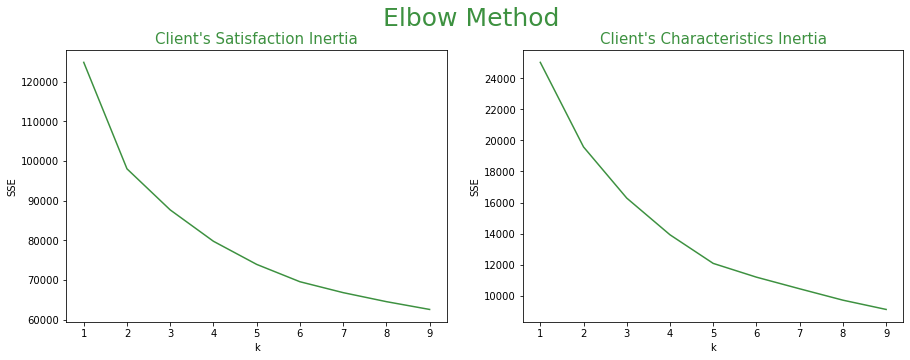

In [41]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
fig, axs = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Elbow Method', size=25, color='#3D9140', y=1)

axs[0].plot(listk_sat, inertias_sat,color='#3D9140')
axs[0].set_title("Client's Satisfaction Inertia", size=15, color='#3D9140')
axs[1].plot(listk_char, inertias_char, color='#3D9140')
axs[1].set_title("Client's Characteristics Inertia", size=15, color='#3D9140')

for i in [0,1]:
    axs[i].set_xlabel('k')
    axs[i].set_ylabel('SSE')
    
plt.show()

### 5.1.2. Number of Clusters: Dendogram

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage
#Satisfaction data:
hcluster_sat_ce = linkage(satisf_data, 'complete') 
hcluster_sat_a = linkage(satisf_data, 'average')
hcluster_sat_s = linkage(satisf_data, 'single')
hcluster_sat_wa = linkage(satisf_data, 'ward')


#Characteristics data:
hcluster_char_ce = linkage(charac_data, 'complete') 
hcluster_char_a = linkage(charac_data, 'average')
hcluster_char_s = linkage(charac_data, 'single')
hcluster_char_w = linkage(charac_data, 'ward')

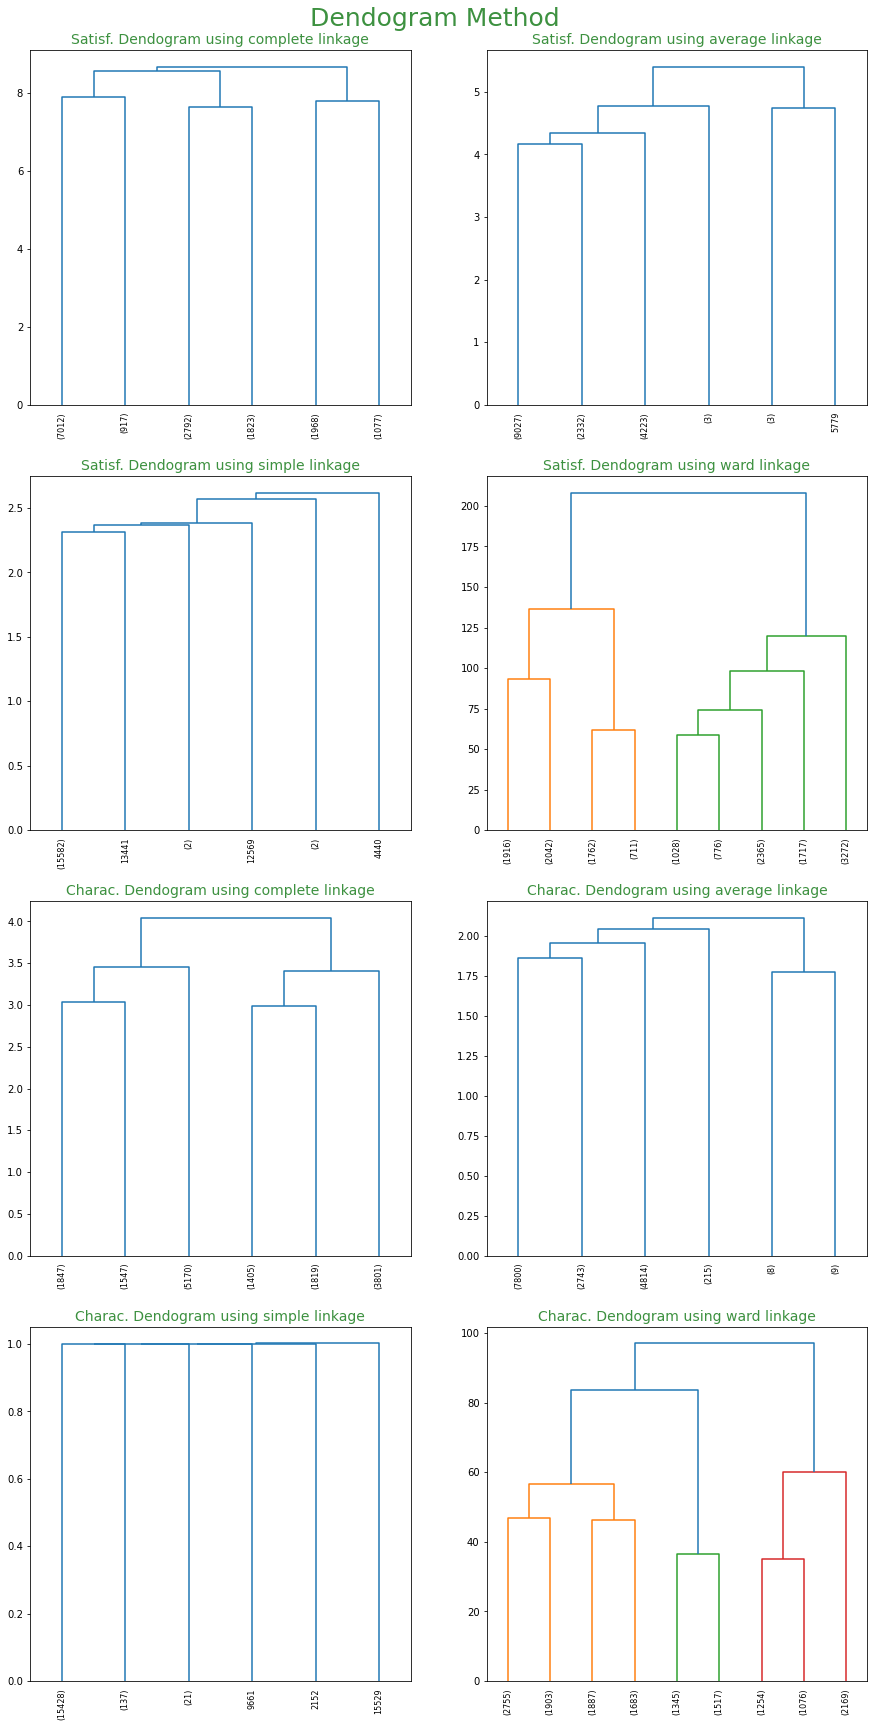

In [43]:
#Plotting the dendograms:
fig, axs = plt.subplots(4,2, figsize=(15,30))
fig.suptitle('Dendogram Method', size=25, color='#3D9140', y=0.9)

dendrogram( hcluster_sat_ce, truncate_mode='lastp', p=6, show_leaf_counts=True, leaf_rotation=90.,leaf_font_size=8.,
    show_contracted=False, ax=axs[0,0], orientation='top',distance_sort='descending')
axs[0,0].set_title("Satisf. Dendogram using complete linkage", size=14, color='#3D9140')

dendrogram( hcluster_sat_a, truncate_mode='lastp', p=6, show_leaf_counts=True, leaf_rotation=90.,leaf_font_size=8., 
    show_contracted=False, ax=axs[0,1], orientation='top',distance_sort='descending')
axs[0,1].set_title("Satisf. Dendogram using average linkage", size=14, color='#3D9140')
 
dendrogram( hcluster_sat_s, truncate_mode='lastp', p=6, show_leaf_counts=True, leaf_rotation=90.,leaf_font_size=8., 
    show_contracted=False, ax=axs[1,0],orientation='top',distance_sort='descending')
axs[1,0].set_title("Satisf. Dendogram using simple linkage", size=14, color='#3D9140')

dendrogram( hcluster_sat_wa, truncate_mode='lastp', p=9, show_leaf_counts=True, leaf_rotation=90.,leaf_font_size=8., 
    show_contracted=False, ax=axs[1,1], orientation='top',distance_sort='descending')
axs[1,1].set_title("Satisf. Dendogram using ward linkage", size=14, color='#3D9140')


dendrogram( hcluster_char_ce, truncate_mode='lastp', p=6, show_leaf_counts=True, leaf_rotation=90.,leaf_font_size=8.,
    show_contracted=False, ax=axs[2,0], orientation='top',distance_sort='descending')
axs[2,0].set_title("Charac. Dendogram using complete linkage", size=14, color='#3D9140')

dendrogram( hcluster_char_a, truncate_mode='lastp', p=6, show_leaf_counts=True, leaf_rotation=90.,leaf_font_size=8., 
    show_contracted=False, ax=axs[2,1], orientation='top',distance_sort='descending')
axs[2,1].set_title("Charac. Dendogram using average linkage", size=14, color='#3D9140')
 
dendrogram( hcluster_char_s, truncate_mode='lastp', p=6, show_leaf_counts=True, leaf_rotation=90.,leaf_font_size=8., 
    show_contracted=False, ax=axs[3,0],orientation='top',distance_sort='descending')
axs[3,0].set_title("Charac. Dendogram using simple linkage", size=14, color='#3D9140')

dendrogram( hcluster_char_w, truncate_mode='lastp', p=9, show_leaf_counts=True, leaf_rotation=90.,leaf_font_size=8., 
    show_contracted=False, ax=axs[3,1], orientation='top',distance_sort='descending')
axs[3,1].set_title("Charac. Dendogram using ward linkage", size=14, color='#3D9140')

#So we end up wuth 3 clusters in both categories

plt.show()


### 5.1.3. Number of Clusters: Silhouette

In [44]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [45]:
#Function to evaluate all clusters
def silhouette(X, algorithm):
    range_n_clusters = [2, 3, 4, 5, 6]
    silhouette_scores =[]
    
    for n_clusters in range_n_clusters:
        # Initialize the clusterer with n_clusters value
        clusterer = algorithm(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)

        print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
    return silhouette_scores

In [46]:
Xsatisfaction = S_data[['Comfort','ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace','CheckOut', 'Checkin', 'Cleanliness','BarService']].values
k_means_satisfaction_silhouette = silhouette(Xsatisfaction, KMeans)

For n_clusters = 2 The average silhouette_score is : 0.20816855382506125
For n_clusters = 3 The average silhouette_score is : 0.1575732270111945
For n_clusters = 4 The average silhouette_score is : 0.15303244780803082
For n_clusters = 5 The average silhouette_score is : 0.1564468297484964
For n_clusters = 6 The average silhouette_score is : 0.15616622718851142


In [47]:
Xcharacteristics = S_data[['Churn', 'Longevity', 'Age', 'Leisure_Travel', 'Single_Room', 'New_RewardPoints']].values
k_means_characteristics_silhouette = silhouette(Xcharacteristics, KMeans)

For n_clusters = 2 The average silhouette_score is : 0.23029211898501112
For n_clusters = 3 The average silhouette_score is : 0.23850319024794805
For n_clusters = 4 The average silhouette_score is : 0.26791812917607694
For n_clusters = 5 The average silhouette_score is : 0.25394154626661913
For n_clusters = 6 The average silhouette_score is : 0.26157504525155817


In [48]:
HC_satisfaction_silhoute = silhouette(Xsatisfaction, AgglomerativeClustering)

For n_clusters = 2 The average silhouette_score is : 0.17300693620369917
For n_clusters = 3 The average silhouette_score is : 0.15205107124594272
For n_clusters = 4 The average silhouette_score is : 0.09526609992896783
For n_clusters = 5 The average silhouette_score is : 0.08873625078458273
For n_clusters = 6 The average silhouette_score is : 0.08722803435534174


In [49]:
HC_characteristics_silhoute = silhouette(Xcharacteristics, AgglomerativeClustering)

For n_clusters = 2 The average silhouette_score is : 0.22543125390869706
For n_clusters = 3 The average silhouette_score is : 0.2600979433656181
For n_clusters = 4 The average silhouette_score is : 0.24416977420858924
For n_clusters = 5 The average silhouette_score is : 0.24498290554054947
For n_clusters = 6 The average silhouette_score is : 0.2116357500242137


In [50]:
#Draw the silhoutte
def draw_silhouette(silhouette_scores):
    plt.figure(figsize=(6, 5))
    plt.plot(range(2, 7), silhouette_scores,c="#008fd5",label="Silhouette Coefficient")

### 5.1.4. Implementing Knn-Means Clustering

In [51]:
#Results for the Client's Characteristics part:
#Creating the model
fmodel_charac_knn = KMeans(n_clusters=3)
#Fitting the model upon the data (both)
fmodel_charac_knn.fit(charac_data)
#Checking the centroids of the clusters
fmodel_charac_knn.cluster_centers_
#Creating a new columns that identifies the cluster each customer belongs
X_data['Characteristic Cluster'] = fmodel_charac_knn.labels_

In [52]:
#Results for the Client's Satisfaction part:
#Creating the model
fmodel_satisf_knn = KMeans(n_clusters=2)
#Fitting the model
fmodel_satisf_knn.fit(satisf_data)
#Checking the centroids of the clusters
fmodel_satisf_knn.cluster_centers_
#Creating a new columns that identifies the cluster each customer belongs
X_data['Satisfaction Cluster'] = fmodel_satisf_knn.labels_
X_data.head()

,Churn,Longevity,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,...,CheckOut,Checkin,Cleanliness,BarService,Age,Leisure_Travel,Single_Room,New_RewardPoints,Characteristic Cluster,Satisfaction Cluster
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,1,1,3,4,1,4,4,3,4,3,...,3,4,3,4,48,0,1,32704,0,0
2,0,1,1,1,1,1,5,3,4,5,...,5,1,5,2,57,0,1,31675,0,0
3,1,1,3,3,3,3,1,4,4,3,...,3,2,3,1,48,0,1,31912,0,1
4,0,1,1,1,1,1,4,4,5,4,...,4,4,4,3,29,1,0,-1672,2,0
5,0,1,2,2,3,2,5,5,5,5,...,4,1,3,5,33,0,1,-9801,0,0


### 5.1.4. Profilling the clusters
    -> Exploring the results

In [53]:
#Description of the Satisfaction part clusters
satisf_desc = X_data[['Comfort','ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace','CheckOut', 'Checkin', 'Cleanliness','BarService', 'Satisfaction Cluster']].groupby(['Satisfaction Cluster']).describe().transpose()
pd.set_option('display.max_rows', None)
satisf_desc

Satisfaction Cluster               0            1
Comfort           count  9244.000000  6345.000000
                  mean      3.062852     2.519307
                  std       1.414156     1.284173
                  min       0.000000     0.000000
                  25%       2.000000     2.000000
                  50%       3.000000     2.000000
                  75%       4.000000     3.000000
                  max       5.000000     5.000000
ReceptionSchedule count  9244.000000  6345.000000
                  mean      3.150584     2.773838
                  std       1.515772     1.495920
                  min       0.000000     0.000000
                  25%       2.000000     2.000000
                  50%       3.000000     3.000000
                  75%       4.000000     4.000000
                  max       5.000000     5.000000
FoodDrink         count  9244.000000  6345.000000
                  mean      2.965707     2.668085
                  std       1.430269     1.428464
                  min       0.000000     0.000000
                  25%       2.000000     2.000000
                  50%       3.000000     3.000000
                  75%       4.000000     4.000000
                  max       5.000000     5.000000
Location          count  9244.000000  6345.000000
                  mean      2.993185     2.975571
                  std       1.339186     1.239280
                  min       1.000000     1.000000
                  25%       2.000000     2.000000
                  50%       3.000000     3.000000
                  75%       4.000000     4.000000
                  max       5.000000     5.000000
Wifi              count  9244.000000  6345.000000
                  mean      3.464734     2.919464
                  std       1.258854     1.347657
                  min       0.000000     0.000000
                  25%       2.000000     2.000000
                  50%       4.000000     3.000000
                  75%       5.000000     4.000000
                  max       5.000000     5.000000
Amenities         count  9244.000000  6345.000000
                  mean      3.746106     2.833885
                  std       1.267488     1.288402
                  min       0.000000     0.000000
                  25%       3.000000     2.000000
                  50%       4.000000     3.000000
                  75%       5.000000     4.000000
                  max       5.000000     5.000000
Staff             count  9244.000000  6345.000000
                  mean      3.848118     3.008511
                  std       1.223342     1.296125
                  min       1.000000     1.000000
                  25%       3.000000     2.000000
                  50%       4.000000     3.000000
                  75%       5.000000     4.000000
                  max       5.000000     5.000000
OnlineBooking     count  9244.000000  6345.000000
                  mean      3.948507     2.734121
                  std       1.101448     1.255659
                  min       1.000000     0.000000
                  25%       3.000000     2.000000
                  50%       4.000000     3.000000
                  75%       5.000000     4.000000
                  max       5.000000     5.000000
PriceQuality      count  9244.000000  6345.000000
                  mean      4.195803     2.387234
                  std       0.770802     1.070465
                  min       1.000000     1.000000
                  25%       4.000000     1.000000
                  50%       4.000000     2.000000
                  75%       5.000000     3.000000
                  max       5.000000     5.000000
RoomSpace         count  9244.000000  6345.000000
                  mean      3.884141     2.868716
                  std       1.100535     1.318079
                  min       0.000000     0.000000
                  25%       3.000000     2.000000
                  50%       4.000000     3.000000
                  75%       5.000000     4.000000


In [54]:
#Description of the Characteristics part clusters
charac_desc = X_data[['Churn', 'Longevity', 'Age', 'Leisure_Travel', 'Single_Room', 'New_RewardPoints', 'Characteristic Cluster']].groupby(['Characteristic Cluster']).describe().transpose()
charac_desc

Characteristic Cluster             0             1             2
Churn            count   6598.000000   4264.000000   4727.000000
                 mean       0.222795      0.512430      0.731331
                 std        0.416153      0.499904      0.443314
                 min        0.000000      0.000000      0.000000
                 25%        0.000000      0.000000      0.000000
                 50%        0.000000      1.000000      1.000000
                 75%        0.000000      1.000000      1.000000
                 max        1.000000      1.000000      1.000000
Longevity        count   6598.000000   4264.000000   4727.000000
                 mean       0.891482      0.971388      0.569283
                 std        0.311057      0.166732      0.495229
                 min        0.000000      0.000000      0.000000
                 25%        1.000000      1.000000      0.000000
                 50%        1.000000      1.000000      1.000000
                 75%        1.000000      1.000000      1.000000
                 max        1.000000      1.000000      1.000000
Age              count   6598.000000   4264.000000   4727.000000
                 mean      44.109427     51.730300     24.374022
                 std       11.430030     10.721321      8.539826
                 min       13.000000     31.000000      7.000000
                 25%       37.000000     43.000000     19.000000
                 50%       44.000000     50.000000     25.000000
                 75%       53.000000     60.000000     30.000000
                 max       85.000000     81.000000     48.000000
Leisure_Travel   count   6598.000000   4264.000000   4727.000000
                 mean       0.011670      0.675422      0.396869
                 std        0.107405      0.468272      0.489300
                 min        0.000000      0.000000      0.000000
                 25%        0.000000      0.000000      0.000000
                 50%        0.000000      1.000000      0.000000
                 75%        0.000000      1.000000      1.000000
                 max        1.000000      1.000000      1.000000
Single_Room      count   6598.000000   4264.000000   4727.000000
                 mean       1.000000      0.027439      0.153797
                 std        0.000000      0.163378      0.360793
                 min        1.000000      0.000000      0.000000
                 25%        1.000000      0.000000      0.000000
                 50%        1.000000      0.000000      0.000000
                 75%        1.000000      0.000000      0.000000
                 max        1.000000      1.000000      1.000000
New_RewardPoints count   6598.000000   4264.000000   4727.000000
                 mean    -435.752804   -746.597561  -1169.114237
                 std    19067.259709  18666.916545  18882.911240
                 min   -32768.000000 -32768.000000 -32768.000000
                 25%   -16443.000000 -16150.000000 -17358.000000
                 50%     -502.500000   -803.000000  -1379.000000
                 75%    15901.000000  14769.000000  14984.000000
                 max    32728.000000  32712.000000  32721.000000

    -> Visualizing the Results

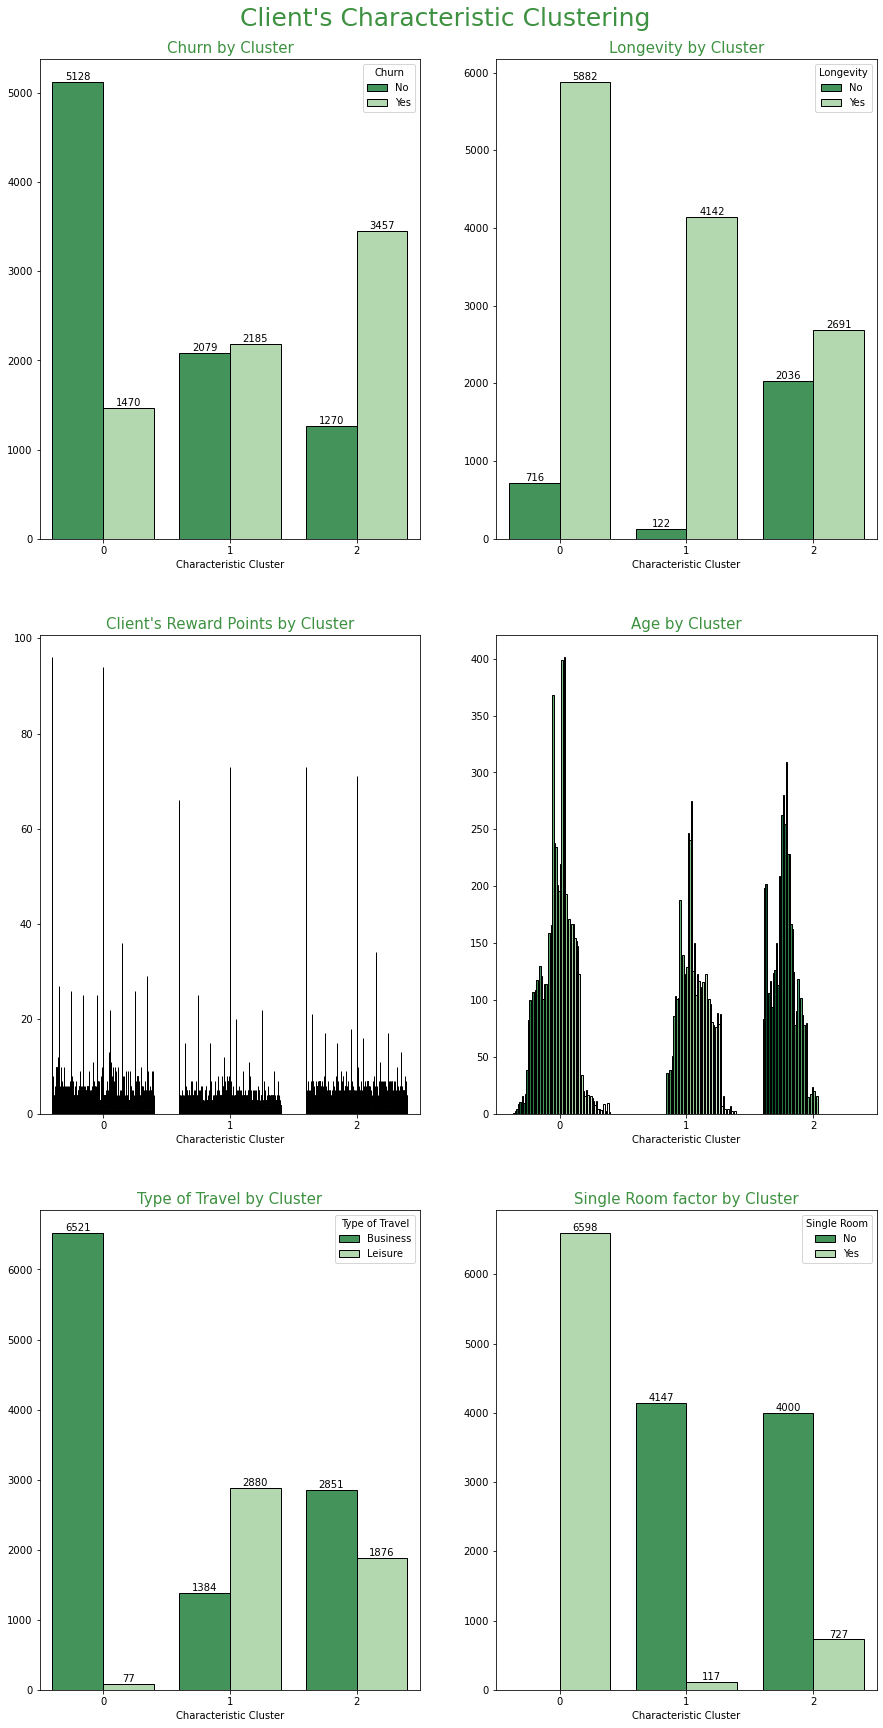

In [55]:
#Now we will create a plot for each variable in the Clients Characteristics
#Creating the plots
fig, axs = plt.subplots(3,2, figsize=(15,30))
fig.suptitle("Client's Characteristic Clustering", size=25, color='#3D9140', y=0.904)

sns.countplot(x='Characteristic Cluster', ax=axs[0,0], data=X_data, hue='Churn',  edgecolor='black',  palette='Greens_r')
axs[0,0].set_title("Churn by Cluster", color='#3D9140', size=15 )
axs[0,0].bar_label(axs[0,0].containers[0], size=10)
axs[0,0].bar_label(axs[0,0].containers[1], size=10) 
axs[0,0].legend(('No','Yes'), title='Churn')
plt.setp(axs[0,0], ylabel='')

sns.countplot(x='Characteristic Cluster', ax=axs[0,1], data=X_data, hue='Longevity',  edgecolor='black',  palette='Greens_r')
axs[0,1].set_title("Longevity by Cluster", color='#3D9140', size=15 )
axs[0,1].bar_label(axs[0,1].containers[0], size=10)
axs[0,1].bar_label(axs[0,1].containers[1], size=10)
axs[0,1].legend(('No','Yes'), title='Longevity')
plt.setp(axs[0,1], ylabel='')

sns.countplot(x='Characteristic Cluster', ax=axs[1,1], data=X_data, hue='Age',  edgecolor='black',  palette='Greens_r')
axs[1,1].set_title("Age by Cluster", color='#3D9140', size=15 )
plt.setp(axs[1,1], ylabel='')
axs[1,1].get_legend().remove()

sns.countplot(x='Characteristic Cluster', ax=axs[2,0], data=X_data, hue='Leisure_Travel',  edgecolor='black',  palette='Greens_r')
axs[2,0].set_title("Type of Travel by Cluster", color='#3D9140', size=15 )
axs[2,0].bar_label(axs[2,0].containers[0], size=10)
axs[2,0].bar_label(axs[2,0].containers[1], size=10) 
axs[2,0].legend(('Business','Leisure'), title='Type of Travel')
plt.setp(axs[2,0], ylabel='')

sns.countplot(x='Characteristic Cluster', ax=axs[2,1], data=X_data, hue='Single_Room',  edgecolor='black',  palette='Greens_r')
axs[2,1].set_title("Single Room factor by Cluster", color='#3D9140', size=15 )
axs[2,1].bar_label(axs[2,1].containers[0], size=10)
axs[2,1].bar_label(axs[2,1].containers[1], size=10) 
axs[2,1].legend(('No','Yes'), title='Single Room')
plt.setp(axs[2,1], ylabel='')

sns.countplot(x='Characteristic Cluster', ax=axs[1,0], data=X_data, hue='New_RewardPoints',  edgecolor='black',  palette='Greens_r')
axs[1,0].set_title("Client's Reward Points by Cluster", color='#3D9140', size=15 )
plt.setp(axs[1,0], ylabel='')
axs[1,0].get_legend().remove()

[Text(0, 0.5, '')]

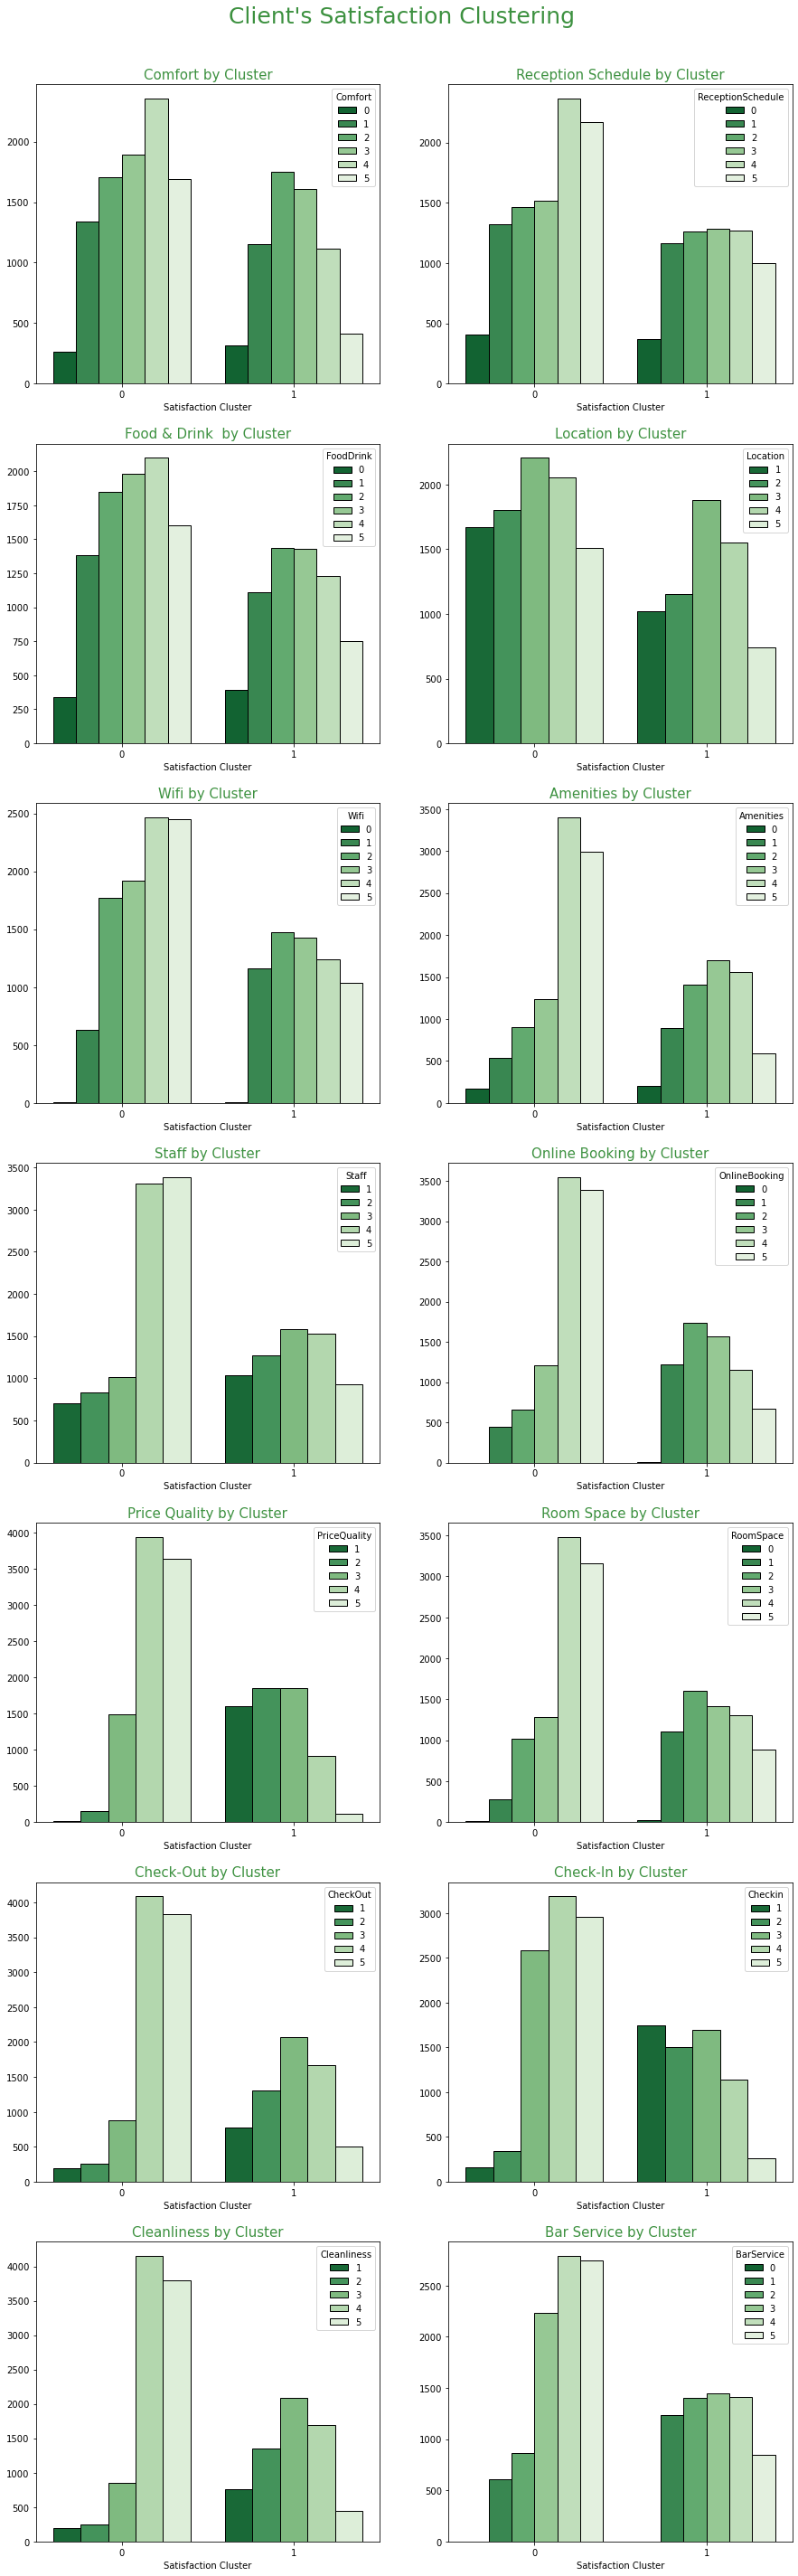

In [56]:
#Now we will create a plot for each variable in the Clients Satisfaction
#Creating the plots
fig, axs = plt.subplots(7,2, figsize=(15,50))
fig.suptitle("Client's Satisfaction Clustering", size=25, color='#3D9140', y=0.904)

sns.countplot(x='Satisfaction Cluster', ax=axs[0,0], data=X_data, hue='Comfort',  edgecolor='black',  palette='Greens_r')
axs[0,0].set_title("Comfort by Cluster", color='#3D9140', size=15 )
plt.setp(axs[0,0], ylabel='')

sns.countplot(x='Satisfaction Cluster', ax=axs[0,1], data=X_data, hue='ReceptionSchedule',  edgecolor='black',  palette='Greens_r')
axs[0,1].set_title("Reception Schedule by Cluster", color='#3D9140', size=15 )
plt.setp(axs[0,1], ylabel='')

sns.countplot(x='Satisfaction Cluster', ax=axs[1,0], data=X_data, hue='FoodDrink',  edgecolor='black',  palette='Greens_r')
axs[1,0].set_title("Food & Drink  by Cluster", color='#3D9140', size=15)
plt.setp(axs[1,0], ylabel='')

sns.countplot(x='Satisfaction Cluster', ax=axs[1,1], data=X_data, hue='Location',  edgecolor='black',  palette='Greens_r')
axs[1,1].set_title("Location by Cluster", color='#3D9140', size=15 )
plt.setp(axs[1,1], ylabel='')

sns.countplot(x='Satisfaction Cluster', ax=axs[2,0], data=X_data, hue='Wifi',  edgecolor='black',  palette='Greens_r')
axs[2,0].set_title("Wifi by Cluster", color='#3D9140', size=15 )
plt.setp(axs[2,0], ylabel='')

sns.countplot(x='Satisfaction Cluster', ax=axs[2,1], data=X_data, hue='Amenities',  edgecolor='black',  palette='Greens_r')
axs[2,1].set_title("Amenities by Cluster", color='#3D9140', size=15 )
plt.setp(axs[2,1], ylabel='')

sns.countplot(x='Satisfaction Cluster', ax=axs[3,0], data=X_data, hue='Staff',  edgecolor='black',  palette='Greens_r')
axs[3,0].set_title("Staff by Cluster", color='#3D9140', size=15 )
plt.setp(axs[3,0], ylabel='')

sns.countplot(x='Satisfaction Cluster', ax=axs[3,1], data=X_data, hue='OnlineBooking',  edgecolor='black',  palette='Greens_r')
axs[3,1].set_title("Online Booking by Cluster", color='#3D9140', size=15 )
plt.setp(axs[3,1], ylabel='')

sns.countplot(x='Satisfaction Cluster', ax=axs[4,0], data=X_data, hue='PriceQuality',  edgecolor='black',  palette='Greens_r')
axs[4,0].set_title("Price Quality by Cluster", color='#3D9140', size=15 )
plt.setp(axs[4,0], ylabel='')

sns.countplot(x='Satisfaction Cluster', ax=axs[4,1], data=X_data, hue='RoomSpace',  edgecolor='black',  palette='Greens_r')
axs[4,1].set_title("Room Space by Cluster", color='#3D9140', size=15 )
plt.setp(axs[4,1], ylabel='')

sns.countplot(x='Satisfaction Cluster', ax=axs[5,0], data=X_data, hue='CheckOut',  edgecolor='black',  palette='Greens_r')
axs[5,0].set_title("Check-Out by Cluster", color='#3D9140', size=15 )
plt.setp(axs[5,0], ylabel='')

sns.countplot(x='Satisfaction Cluster', ax=axs[5,1], data=X_data, hue='Checkin',  edgecolor='black',  palette='Greens_r')
axs[5,1].set_title("Check-In by Cluster", color='#3D9140', size=15 )
plt.setp(axs[5,1], ylabel='')

sns.countplot(x='Satisfaction Cluster', ax=axs[6,0], data=X_data, hue='Cleanliness',  edgecolor='black',  palette='Greens_r')
axs[6,0].set_title("Cleanliness by Cluster", color='#3D9140', size=15 )
plt.setp(axs[6,0], ylabel='')

sns.countplot(x='Satisfaction Cluster', ax=axs[6,1], data=X_data, hue='BarService',  edgecolor='black',  palette='Greens_r')
axs[6,1].set_title("Bar Service by Cluster", color='#3D9140', size=15 )
plt.setp(axs[6,1], ylabel='')




In [57]:
#Turn off teh option of show the hole graph
pd.set_option('display.max_rows', False)

## 5.2. SOM

### 5.2.1. Implementation

In [58]:
import sompy
from sompy.sompy import SOMFactory

In [59]:
charac_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15589 entries, 1 to 15589
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             15589 non-null  float16
 1   Longevity         15589 non-null  float16
 2   Age               15589 non-null  float16
 3   Leisure_Travel    15589 non-null  float16
 4   Single_Room       15589 non-null  float16
 5   New_RewardPoints  15589 non-null  float16
dtypes: float16(6)
memory usage: 820.5 KB


In [60]:
#Converting to np arrays
df_charac = np.float16(charac_data.values)
df_satisf = np.float16(satisf_data.values)

In [61]:
rows=20
columns=20
mapsize = [rows, columns]

# this will use the default parameters, but you can change the initialization and neighborhood methods

#Characteristics:
charac_som = SOMFactory().build(df_charac, mapsize, mask=None, 
                         mapshape='planar', # 2Dimensions
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', # standardize the variables
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'


#Satisfaction:
satisf_som = SOMFactory().build(df_satisf, mapsize, mask=None, 
                         mapshape='planar', # 2Dimensions
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', # standardize the variables
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'

In [62]:
#Training the model:

#Characteristics:
charac_som.train(n_job=1, verbose=False, train_rough_len=5, train_finetune_len=4)

#Satisfactions:
satisf_som.train(n_job=1, verbose=False, train_rough_len=3, train_finetune_len=6)

### 5.2.2. Interpretation:

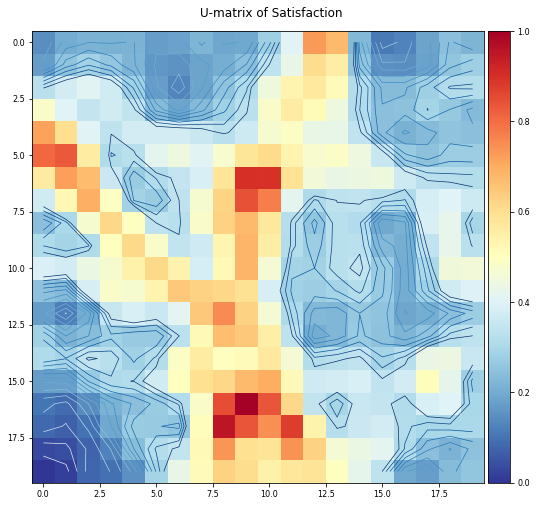

In [63]:
u = sompy.umatrix.UMatrixView(20, 20, title='U-matrix of Satisfaction', show_axis=True, text_size=8, show_text=True)


#Building a matrix to examine the number of clusters

#Satisfaction:
UMAT_s  = u.build_u_matrix(satisf_som, distance=1, row_normalized=False)
_, umat = u.show(satisf_som, distance=1, row_normalized=True, contour=True, blob=False)

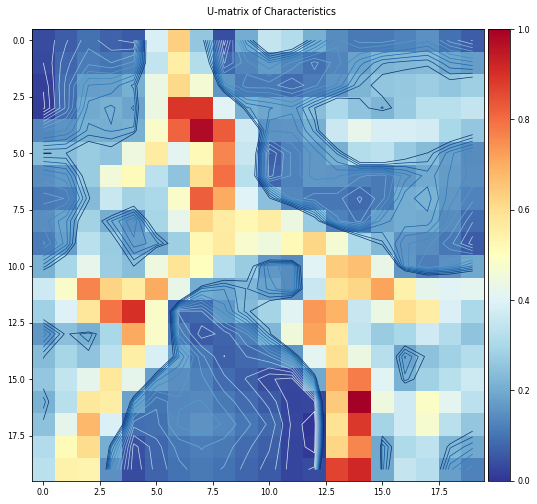

In [64]:
v = sompy.umatrix.UMatrixView(rows, columns, title='U-matrix of Characteristics', show_axis=True, text_size=8, show_text=True)

#Characteristics:
UMAT_c  = v.build_u_matrix(charac_som, distance=1, row_normalized=False)
_, umat = v.show(charac_som, distance=1, row_normalized=True, contour=True, blob=False)

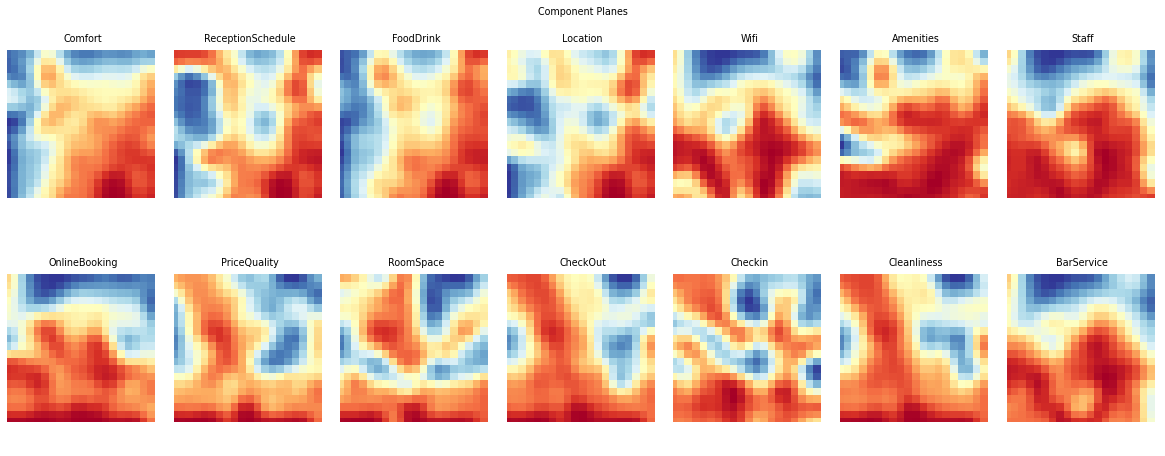

In [65]:
# Interpretation of each component palne

#Satisfaction
satisf_som.component_names = satisf_data.columns
comp_planes_sat = sompy.mapview.View2DPacked(rows, columns, 'Component Planes', text_size=8)  
comp_planes_sat.show(satisf_som, what='codebook', which_dim='all', col_sz=7.5) #which_dim='all' default

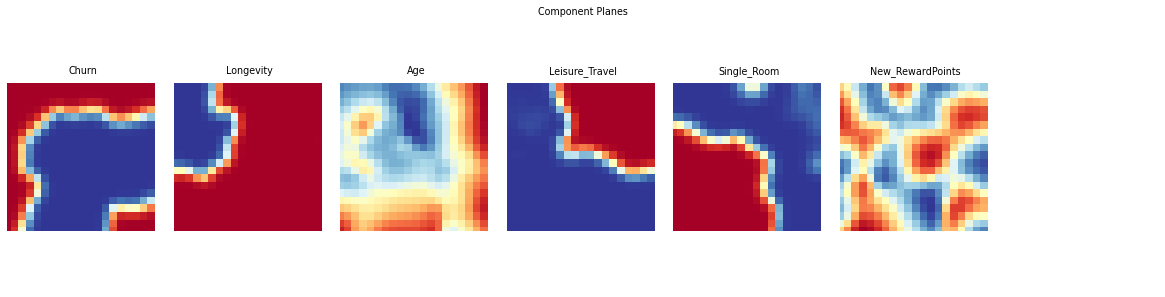

In [66]:
#Characteristics
charac_som.component_names = charac_data.columns
comp_planes_char = sompy.mapview.View2DPacked(rows, columns, 'Component Planes', text_size=8)  
comp_planes_char.show(charac_som, what='codebook', which_dim='all', col_sz=7.5) #which_dim='all' default

### 5.2.3. Clustering with SOM 

#### Option 1: K-Means over SOM

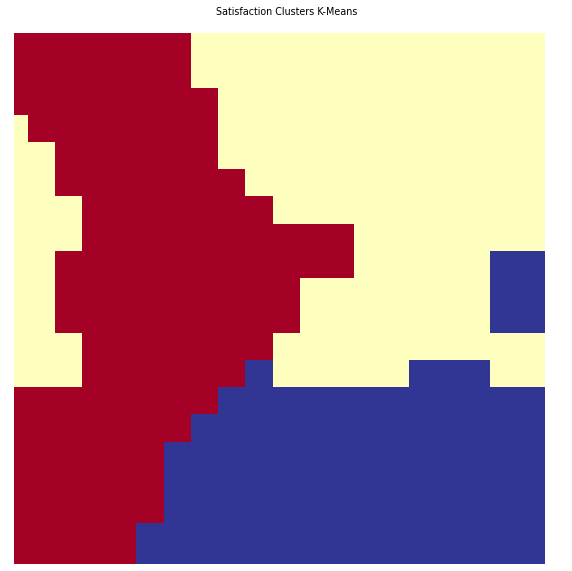

In [67]:
#Satisfaction

#first you can do clustering. Currently only K-means on top of the trained som
cl_sat = satisf_som.cluster(n_clusters=3)
sat_labels = getattr(satisf_som, 'cluster_labels')

vsat = sompy.mapview.View2DPacked(width=10, height=10, title='Satisfaction Clusters K-Means', text_size=8) 
vsat.show(satisf_som, what='cluster')

In [68]:
bmus = satisf_som.project_data(df_satisf)
satisf_data['bmu'] = bmus
satisf_data['satisf label'] = sat_labels[satisf_data['bmu']]

In [69]:
som_final = copy.copy(deep=True)
som_final['sat_label'] = satisf_data['satisf label']

som_final.head()

,Churn,Longevity,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,...,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Age,Leisure_Travel,Single_Room,New_RewardPoints,sat_label
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,1,1,3,4,1,4,4,3,4,3,...,3,3,4,3,4,48,0,1,32704,1
2,0,1,1,1,1,1,5,3,4,5,...,5,5,1,5,2,57,0,1,31675,2
3,1,1,3,3,3,3,1,4,4,3,...,2,3,2,3,1,48,0,1,31912,1
4,0,1,1,1,1,1,4,4,5,4,...,4,4,4,4,3,29,1,0,-1672,2
5,0,1,2,2,3,2,5,5,5,5,...,3,4,1,3,5,33,0,1,-9801,1


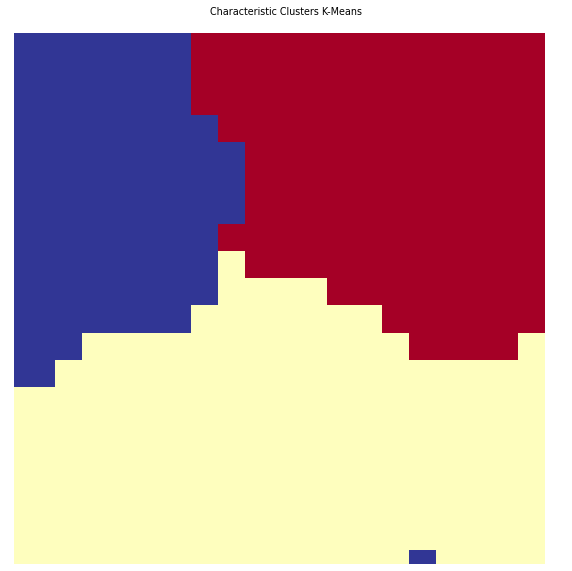

In [70]:
#Characteristics

cl_char = charac_som.cluster(n_clusters=3)
char_labels = getattr(charac_som, 'cluster_labels')

vchar = sompy.mapview.View2DPacked(width=10, height=10, title='Characteristic Clusters K-Means', text_size=8) 
vchar.show(charac_som, what='cluster')


In [71]:
bmus = charac_som.project_data(df_charac)
charac_data['bmu'] = bmus
charac_data['charac label'] = char_labels[charac_data['bmu']]

In [72]:
som_final['char_label'] = charac_data['charac label']

som_final.head()

,Churn,Longevity,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,...,CheckOut,Checkin,Cleanliness,BarService,Age,Leisure_Travel,Single_Room,New_RewardPoints,sat_label,char_label
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,1,1,3,4,1,4,4,3,4,3,...,3,4,3,4,48,0,1,32704,1,1
2,0,1,1,1,1,1,5,3,4,5,...,5,1,5,2,57,0,1,31675,2,1
3,1,1,3,3,3,3,1,4,4,3,...,3,2,3,1,48,0,1,31912,1,1
4,0,1,1,1,1,1,4,4,5,4,...,4,4,4,3,29,1,0,-1672,2,2
5,0,1,2,2,3,2,5,5,5,5,...,4,1,3,5,33,0,1,-9801,1,1


In [73]:
pd.set_option('display.max_rows', None)
descr_sat = som_final.reset_index(drop=True)
descr_sat = descr_sat.groupby(['sat_label'])[['Comfort','ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace','CheckOut', 'Checkin', 'Cleanliness','BarService']].describe().T
descr_sat

sat_label                          0            1            2
Comfort           count  3704.000000  5692.000000  6193.000000
                  mean      4.221922     2.595924     2.241886
                  std       0.719614     1.249187     1.247197
                  min       1.000000     0.000000     0.000000
                  25%       4.000000     2.000000     1.000000
                  50%       4.000000     3.000000     2.000000
                  75%       5.000000     3.000000     3.000000
                  max       5.000000     5.000000     5.000000
ReceptionSchedule count  3704.000000  5692.000000  6193.000000
                  mean      4.158477     2.838897     2.448248
                  std       0.908741     1.443438     1.506214
                  min       0.000000     0.000000     0.000000
                  25%       4.000000     2.000000     1.000000
                  50%       4.000000     3.000000     2.000000
                  75%       5.000000     4.000000     4.000000
                  max       5.000000     5.000000     5.000000
FoodDrink         count  3704.000000  5692.000000  6193.000000
                  mean      4.135529     2.804989     2.108833
                  std       0.833080     1.383662     1.218044
                  min       0.000000     0.000000     0.000000
                  25%       4.000000     2.000000     1.000000
                  50%       4.000000     3.000000     2.000000
                  75%       5.000000     4.000000     3.000000
                  max       5.000000     5.000000     5.000000
Location          count  3704.000000  5692.000000  6193.000000
                  mean      3.995410     3.066936     2.307928
                  std       0.981729     1.201643     1.127798
                  min       1.000000     1.000000     1.000000
                  25%       3.000000     2.000000     1.000000
                  50%       4.000000     3.000000     2.000000
                  75%       5.000000     4.000000     3.000000
                  max       5.000000     5.000000     5.000000
Wifi              count  3704.000000  5692.000000  6193.000000
                  mean      3.808045     2.974174     3.151623
                  std       1.140722     1.342649     1.306206
                  min       1.000000     0.000000     0.000000
                  25%       3.000000     2.000000     2.000000
                  50%       4.000000     3.000000     3.000000
                  75%       5.000000     4.000000     4.000000
                  max       5.000000     5.000000     5.000000
Amenities         count  3704.000000  5692.000000  6193.000000
                  mean      4.225162     2.928672     3.276280
                  std       0.877636     1.261116     1.434187
                  min       0.000000     0.000000     0.000000
                  25%       4.000000     2.000000     2.000000
                  50%       4.000000     3.000000     4.000000
                  75%       5.000000     4.000000     4.000000
                  max       5.000000     5.000000     5.000000
Staff             count  3704.000000  5692.000000  6193.000000
                  mean      4.170626     3.067814     3.512191
                  std       0.970558     1.293226     1.357302
                  min       1.000000     1.000000     1.000000
                  25%       4.000000     2.000000     2.000000
                  50%       4.000000     3.000000     4.000000
                  75%       5.000000     4.000000     5.000000
                  max       5.000000     5.000000     5.000000
OnlineBooking     count  3704.000000  5692.000000  6193.000000
                  mean      4.297246     2.680429     3.661230
                  std       0.759090     1.235828     1.247301
                  min       1.000000     0.000000     1.000000
                  25%       4.000000     2.000000     3.000000
                  50%       4.000000     3.000000     4.000000
                  75%       5.0

In [74]:
descr_char = som_final.reset_index(drop=True)
descr_char = descr_char.groupby(['sat_label'])[['Churn', 'Longevity', 'Age', 'Leisure_Travel', 'Single_Room', 'New_RewardPoints']].describe().T
descr_char

sat_label                          0             1             2
Churn            count   3704.000000   5692.000000   6193.000000
                 mean       0.143898      0.724526      0.396415
                 std        0.351034      0.446792      0.489192
                 min        0.000000      0.000000      0.000000
                 25%        0.000000      0.000000      0.000000
                 50%        0.000000      1.000000      0.000000
                 75%        0.000000      1.000000      1.000000
                 max        1.000000      1.000000      1.000000
Longevity        count   3704.000000   5692.000000   6193.000000
                 mean       0.899298      0.776177      0.801873
                 std        0.300974      0.416841      0.398620
                 min        0.000000      0.000000      0.000000
                 25%        1.000000      1.000000      1.000000
                 50%        1.000000      1.000000      1.000000
                 75%        1.000000      1.000000      1.000000
                 max        1.000000      1.000000      1.000000
Age              count   3704.000000   5692.000000   6193.000000
                 mean      41.833423     39.592586     39.805587
                 std       14.323452     15.558056     15.025968
                 min        7.000000      7.000000      7.000000
                 25%       31.000000     27.000000     27.000000
                 50%       43.000000     39.000000     40.000000
                 75%       53.000000     50.000000     52.000000
                 max       81.000000     85.000000     81.000000
Leisure_Travel   count   3704.000000   5692.000000   6193.000000
                 mean       0.299406      0.264582      0.358146
                 std        0.458060      0.441149      0.479494
                 min        0.000000      0.000000      0.000000
                 25%        0.000000      0.000000      0.000000
                 50%        0.000000      0.000000      0.000000
                 75%        1.000000      1.000000      1.000000
                 max        1.000000      1.000000      1.000000
Single_Room      count   3704.000000   5692.000000   6193.000000
                 mean       0.602862      0.350843      0.518650
                 std        0.489371      0.477276      0.499692
                 min        0.000000      0.000000      0.000000
                 25%        0.000000      0.000000      0.000000
                 50%        1.000000      0.000000      1.000000
                 75%        1.000000      1.000000      1.000000
                 max        1.000000      1.000000      1.000000
New_RewardPoints count   3704.000000   5692.000000   6193.000000
                 mean    -155.410097  -1078.607344   -786.358792
                 std    19058.882490  18768.463185  18929.580100
                 min   -32768.000000 -32768.000000 -32768.000000
                 25%   -16335.000000 -16701.000000 -17080.000000
                 50%      -67.000000  -1379.000000   -704.000000
                 75%    16192.000000  14848.000000  15256.000000
                 max    32712.000000  32728.000000  32728.000000

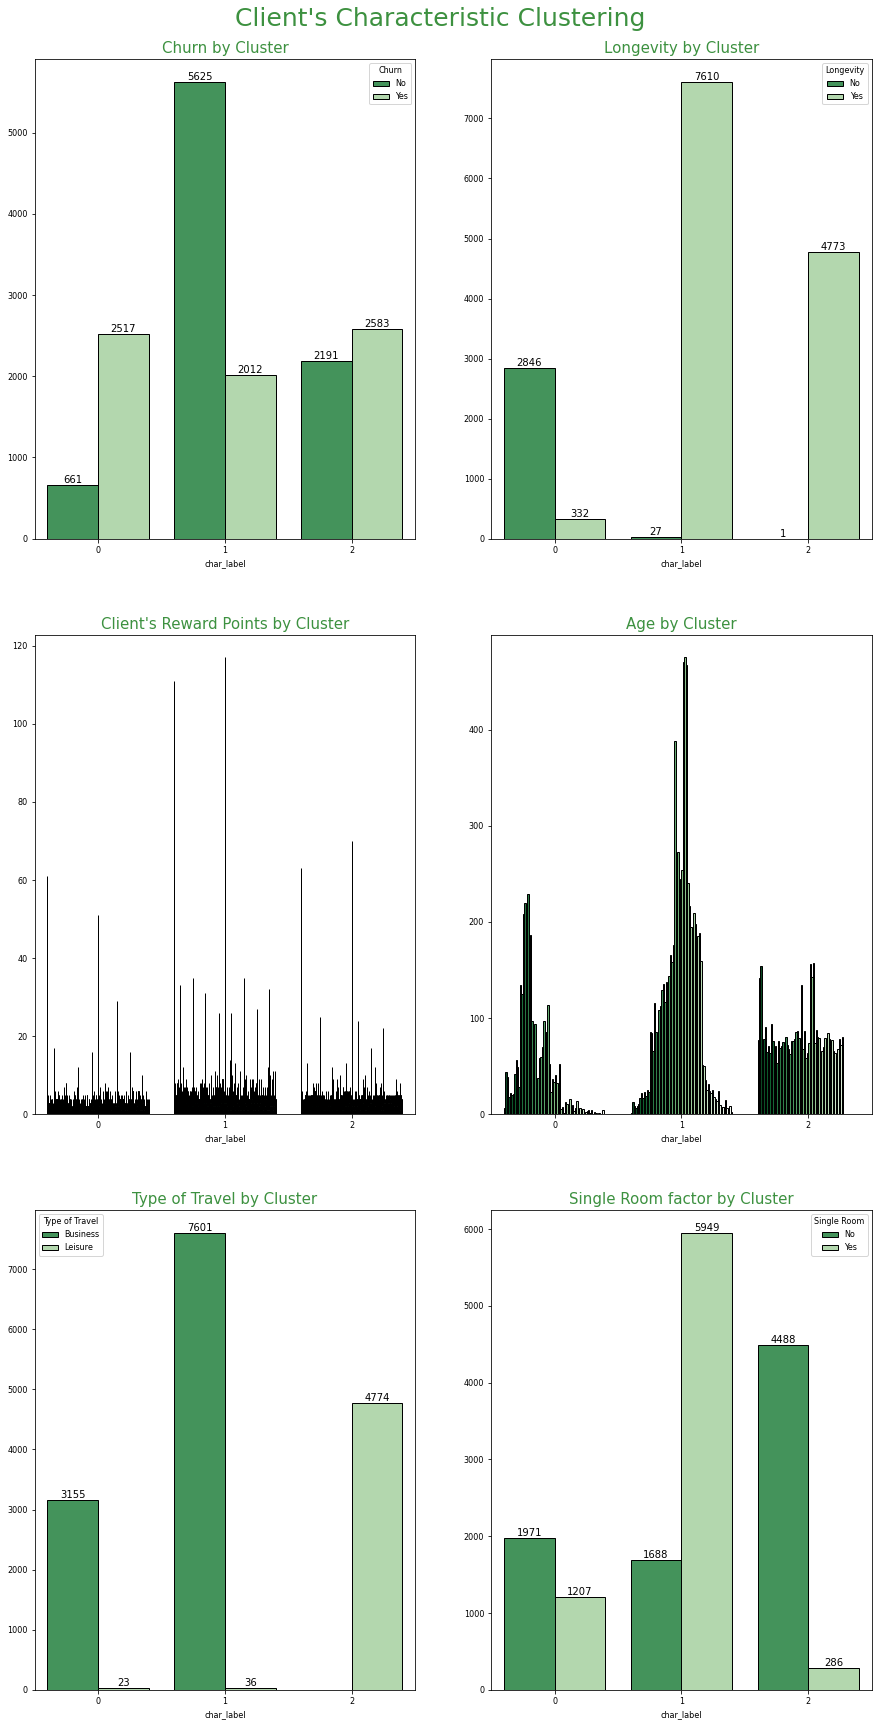

In [75]:
#Now we will create a plot for each variable in the Clients Characteristics in SOM Clusters
#Creating the plots
fig, axs = plt.subplots(3,2, figsize=(15,30))
fig.suptitle("Client's Characteristic Clustering", size=25, color='#3D9140', y=0.904)

sns.countplot(x='char_label', ax=axs[0,0], data=som_final, hue='Churn',  edgecolor='black',  palette='Greens_r')
axs[0,0].set_title("Churn by Cluster", color='#3D9140', size=15 )
axs[0,0].bar_label(axs[0,0].containers[0], size=10)
axs[0,0].bar_label(axs[0,0].containers[1], size=10) 
axs[0,0].legend(('No','Yes'), title='Churn')
plt.setp(axs[0,0], ylabel='')

sns.countplot(x='char_label', ax=axs[0,1], data=som_final, hue='Longevity',  edgecolor='black',  palette='Greens_r')
axs[0,1].set_title("Longevity by Cluster", color='#3D9140', size=15 )
axs[0,1].bar_label(axs[0,1].containers[0], size=10)
axs[0,1].bar_label(axs[0,1].containers[1], size=10)
axs[0,1].legend(('No','Yes'), title='Longevity')
plt.setp(axs[0,1], ylabel='')

sns.countplot(x='char_label', ax=axs[1,1], data=som_final, hue='Age',  edgecolor='black',  palette='Greens_r')
axs[1,1].set_title("Age by Cluster", color='#3D9140', size=15 )
plt.setp(axs[1,1], ylabel='')
axs[1,1].get_legend().remove()

sns.countplot(x='char_label', ax=axs[2,0], data=som_final, hue='Leisure_Travel',  edgecolor='black',  palette='Greens_r')
axs[2,0].set_title("Type of Travel by Cluster", color='#3D9140', size=15 )
axs[2,0].bar_label(axs[2,0].containers[0], size=10)
axs[2,0].bar_label(axs[2,0].containers[1], size=10) 
axs[2,0].legend(('Business','Leisure'), title='Type of Travel')
plt.setp(axs[2,0], ylabel='')

sns.countplot(x='char_label', ax=axs[2,1], data=som_final, hue='Single_Room',  edgecolor='black',  palette='Greens_r')
axs[2,1].set_title("Single Room factor by Cluster", color='#3D9140', size=15 )
axs[2,1].bar_label(axs[2,1].containers[0], size=10)
axs[2,1].bar_label(axs[2,1].containers[1], size=10) 
axs[2,1].legend(('No','Yes'), title='Single Room')
plt.setp(axs[2,1], ylabel='')

sns.countplot(x='char_label', ax=axs[1,0], data=som_final, hue='New_RewardPoints',  edgecolor='black',  palette='Greens_r')
axs[1,0].set_title("Client's Reward Points by Cluster", color='#3D9140', size=15 )
plt.setp(axs[1,0], ylabel='')
axs[1,0].get_legend().remove()

[Text(0, 0.5, '')]

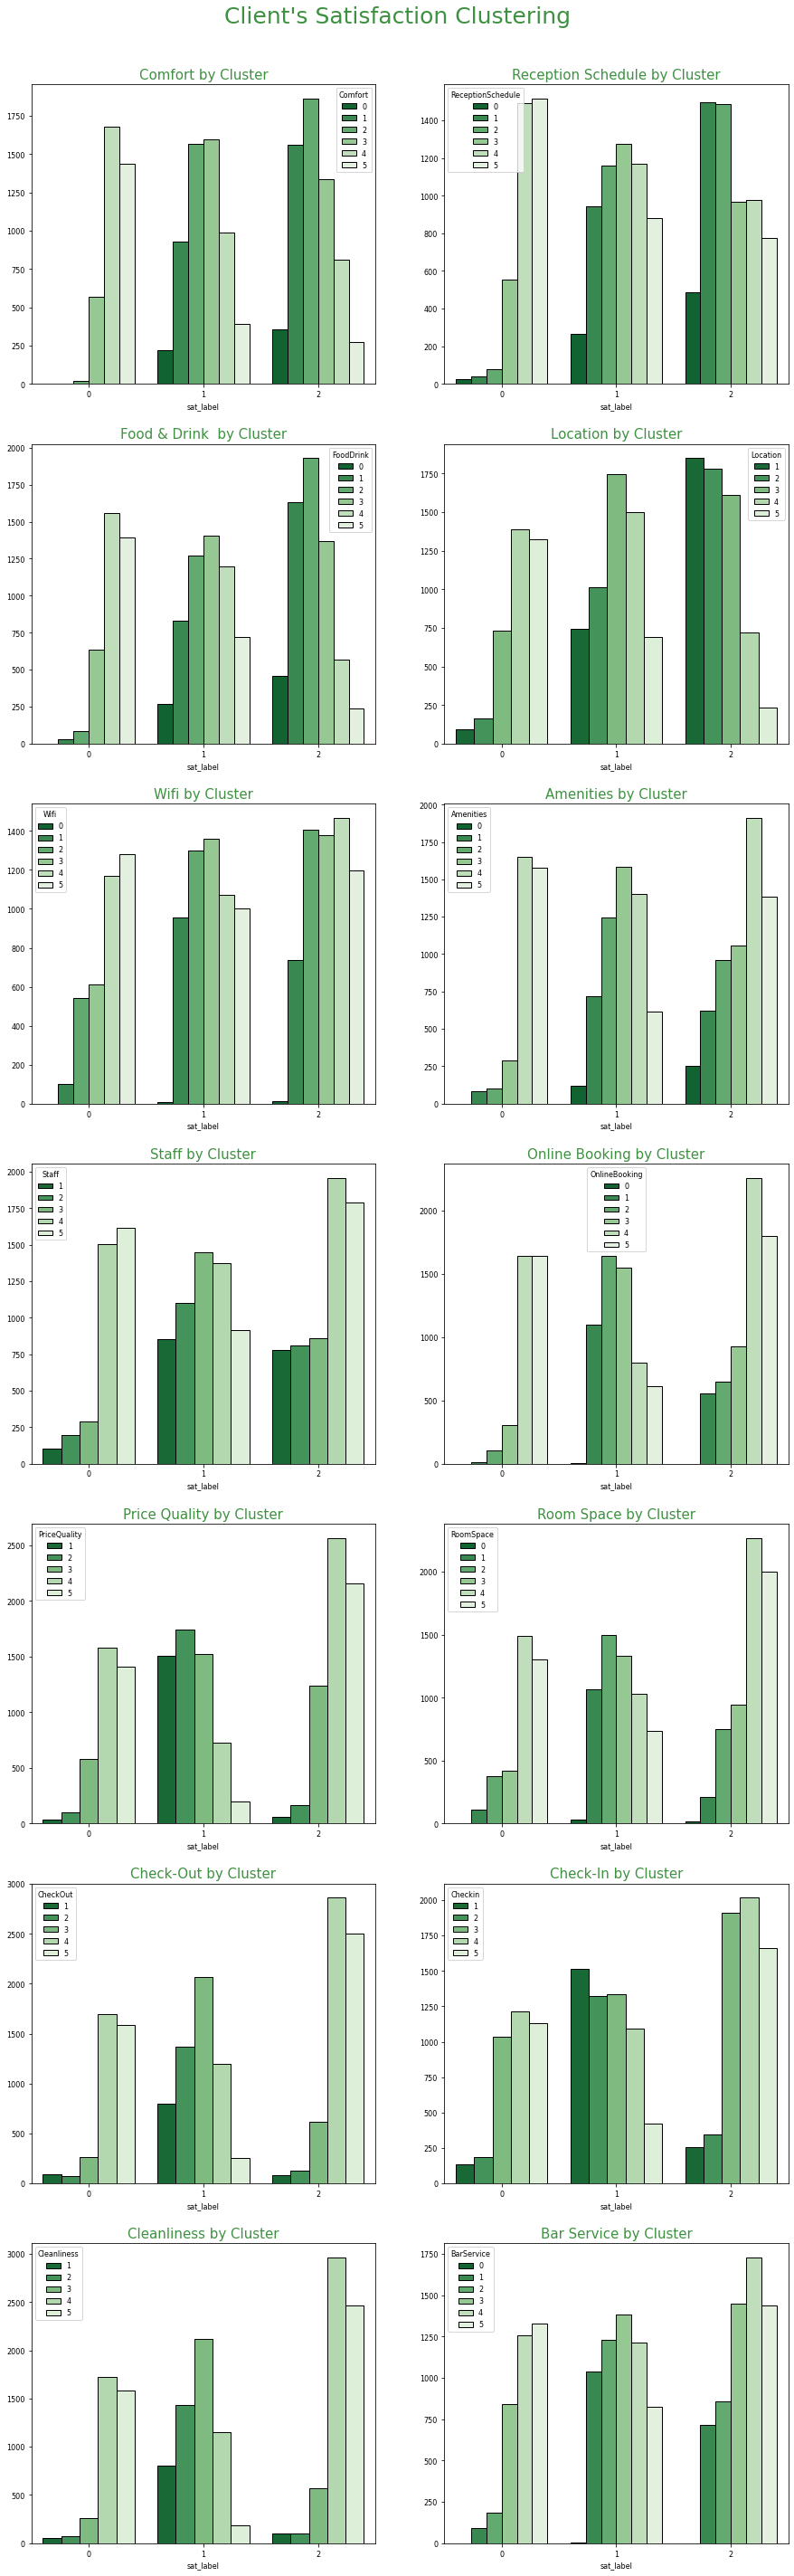

In [76]:
fig, axs = plt.subplots(7,2, figsize=(15,50))
fig.suptitle("Client's Satisfaction Clustering", size=25, color='#3D9140', y=0.904)

sns.countplot(x='sat_label', ax=axs[0,0], data=som_final, hue='Comfort',  edgecolor='black',  palette='Greens_r')
axs[0,0].set_title("Comfort by Cluster", color='#3D9140', size=15 )
plt.setp(axs[0,0], ylabel='')

sns.countplot(x='sat_label', ax=axs[0,1], data=som_final, hue='ReceptionSchedule',  edgecolor='black',  palette='Greens_r')
axs[0,1].set_title("Reception Schedule by Cluster", color='#3D9140', size=15 )
plt.setp(axs[0,1], ylabel='')

sns.countplot(x='sat_label', ax=axs[1,0], data=som_final, hue='FoodDrink',  edgecolor='black',  palette='Greens_r')
axs[1,0].set_title("Food & Drink  by Cluster", color='#3D9140', size=15)
plt.setp(axs[1,0], ylabel='')

sns.countplot(x='sat_label', ax=axs[1,1], data=som_final, hue='Location',  edgecolor='black',  palette='Greens_r')
axs[1,1].set_title("Location by Cluster", color='#3D9140', size=15 )
plt.setp(axs[1,1], ylabel='')

sns.countplot(x='sat_label', ax=axs[2,0], data=som_final, hue='Wifi',  edgecolor='black',  palette='Greens_r')
axs[2,0].set_title("Wifi by Cluster", color='#3D9140', size=15 )
plt.setp(axs[2,0], ylabel='')

sns.countplot(x='sat_label', ax=axs[2,1], data=som_final, hue='Amenities',  edgecolor='black',  palette='Greens_r')
axs[2,1].set_title("Amenities by Cluster", color='#3D9140', size=15 )
plt.setp(axs[2,1], ylabel='')

sns.countplot(x='sat_label', ax=axs[3,0], data=som_final, hue='Staff',  edgecolor='black',  palette='Greens_r')
axs[3,0].set_title("Staff by Cluster", color='#3D9140', size=15 )
plt.setp(axs[3,0], ylabel='')

sns.countplot(x='sat_label', ax=axs[3,1], data=som_final, hue='OnlineBooking',  edgecolor='black',  palette='Greens_r')
axs[3,1].set_title("Online Booking by Cluster", color='#3D9140', size=15 )
plt.setp(axs[3,1], ylabel='')

sns.countplot(x='sat_label', ax=axs[4,0], data=som_final, hue='PriceQuality',  edgecolor='black',  palette='Greens_r')
axs[4,0].set_title("Price Quality by Cluster", color='#3D9140', size=15 )
plt.setp(axs[4,0], ylabel='')

sns.countplot(x='sat_label', ax=axs[4,1], data=som_final, hue='RoomSpace',  edgecolor='black',  palette='Greens_r')
axs[4,1].set_title("Room Space by Cluster", color='#3D9140', size=15 )
plt.setp(axs[4,1], ylabel='')

sns.countplot(x='sat_label', ax=axs[5,0], data=som_final, hue='CheckOut',  edgecolor='black',  palette='Greens_r')
axs[5,0].set_title("Check-Out by Cluster", color='#3D9140', size=15 )
plt.setp(axs[5,0], ylabel='')

sns.countplot(x='sat_label', ax=axs[5,1], data=som_final, hue='Checkin',  edgecolor='black',  palette='Greens_r')
axs[5,1].set_title("Check-In by Cluster", color='#3D9140', size=15 )
plt.setp(axs[5,1], ylabel='')

sns.countplot(x='sat_label', ax=axs[6,0], data=som_final, hue='Cleanliness',  edgecolor='black',  palette='Greens_r')
axs[6,0].set_title("Cleanliness by Cluster", color='#3D9140', size=15 )
plt.setp(axs[6,0], ylabel='')

sns.countplot(x='sat_label', ax=axs[6,1], data=som_final, hue='BarService',  edgecolor='black',  palette='Greens_r')
axs[6,1].set_title("Bar Service by Cluster", color='#3D9140', size=15 )
plt.setp(axs[6,1], ylabel='')

